# <center><u>German Credit Data Set</u></center>

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd

#visualizations
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

#metrics and split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')


## 2. Loading Data

In [2]:
df = pd.read_csv('german_credit_data.csv')

## 3. Data Description

In [3]:
df.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad

In [4]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [5]:
df.shape

(1000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


Saving accounts and Checking account attributes have missing values

In [7]:
df.describe()

Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000

## 4. Data Quality Assessment & Statistical Analysis

### 4.1. Filling missing Values

In [8]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

#### 4.1.1 Savings account Attribute

In [9]:
df['Saving accounts'].isnull().sum()

183

Total number of records is 1000 out of which 183 are null values in the Savings Account attrobute which accounts for 18.3% missing records. We therefore will fill these values using MCT

In [10]:
#mode of Saving Accounts attribute

mode_sav = df['Saving accounts'].mode()
mode_sav

0    little
dtype: object

In [11]:
df['Saving accounts'].fillna(mode_sav[0], inplace=True)

In [12]:
df['Saving accounts'].isnull().sum()

0

#### 4.1.2. Checking account Attribute

In [13]:
df['Checking account'].isnull().sum()

394

Too many records are missing and for the better analysis of the data set with total 1000 records it will be appropiate to fill these values rather than dropping them

In [14]:
#mode of Checking Accouny
mode_check = df['Checking account'].mode()
mode_check

0    little
dtype: object

In [15]:
df['Checking account'].fillna(mode_check[0], inplace=True)

In [16]:
df['Checking account'].isnull().sum()

0

In [17]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [20]:
df.describe()

Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000

<b>The given data set has 4 categorical and 4 numeric attributes/features. The target variable is also categorical.
<br>
<br>
Youngest customer in our data set is 19 years old and the oldest is 75 years old. The average age of people in the given data set is 35. 
<br>
<br>
Majority of the customers lie in skilled class.
<br>
<br>
The max Credit amount granted to customer is 18424 while minimum was 250. The average credit amount granted is 3271. </b>

## 5.Univariate Analysis

In [21]:
#labels
lab = df["Risk"].value_counts().keys().tolist()
#values
val = df["Risk"].value_counts().values.tolist()

trace = go.Pie(labels = lab, values = val, marker = dict(colors = [ 'royalblue','lime'], line = dict(color ="white",width =2)),
               rotation = 100,hoverinfo = "label+value+text", textinfo='label+percent',hole = .5)

layout = go.Layout(dict(title = "Risk Count",paper_bgcolor = "rgb(243,243,243)", plot_bgcolor  = "rgb(243,243,243)"))
                        
data = [trace]

fig = go.Figure(data = data,layout = layout)

py.iplot(fig)

<b>The above plot shows that our data has class imbalance and therefore when using machine learning algorithms we will utilize stratified k fold cross validation that is specifically used to address class imbalance.

In [22]:
#Defining funtion for ploting categorical attributes

def categorical_plots(var, data):
        
    #Adjustment of plots, bigger size and space b/w subplots
    
    fig = plt.figure(figsize=(15,5))
    fig.subplots_adjust(wspace=0.3)
    
    plt.style.use('ggplot')
        
    #1st Plot:  Bar plot     
        
    plt.subplot(1,2,1)
    sns.countplot(x=var, data= data)
    plt.xticks(rotation = 45, horizontalalignment='right')
    plt.xlabel(var.name + ' Distribution')
    

    #2nd Plot: PIE Chart
    
    labels =var.value_counts().index  #Labels that will be written against slices in pie charts
    
    #For the slice with highest value to be exploded, explode parameter is passed. Using for loop to make a tuple of 
    # number of slice using len(unique) and exploding the first slice by mentioning 0.1 at first index. Atlast converted list to tuple
    
    a=[0.1]
    for i in range ((len(var.unique()))-1):
        a.append(0)

    explode1= tuple(a)
    #if var.name != 'Customer Name':
    ax1 = plt.subplot(1,2,2)
    ax1.pie(var.value_counts(), labels=labels,autopct='%1.1f%%', shadow=True,explode= explode1 )
    ax1.axis('equal')
    plt.xlabel(var.name + ' Distribution')
    plt.legend()
        
    show=plt.show()
    
    return(show)

In [23]:
#FOR NUMERICL PLOTS WE WILL BE USING THE FOLLOWING FUNCTION

def numerical_plots(var):
    
    #Adjustment of plots, bigger size and space b/w subplots
    
    fig = plt.figure(figsize=(15,4))
    fig.subplots_adjust(wspace=0.3)
    
    #1st Plot:  Histogram with KDE plot          
 
    plt.subplot(1,3,1)
    sns.distplot(var, color='b')
    plt.xlabel(var.name + ' Distribution')
    
    
    #2nd Plot:  Box plot
    
    plt.subplot(1,3,2)
    sns.boxplot(y=var)
    plt.xlabel(var.name + ' Distribution')
    

    #3rd Plot:  Histogram    

    plt.subplot(1,3,3)
    var.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
    plt.xlabel(var.name + ' Distribution')
    #plt.grid(color='white')
    
    
    show=plt.show()
    
    return(show)

#### 5.1.1. Age Attribute

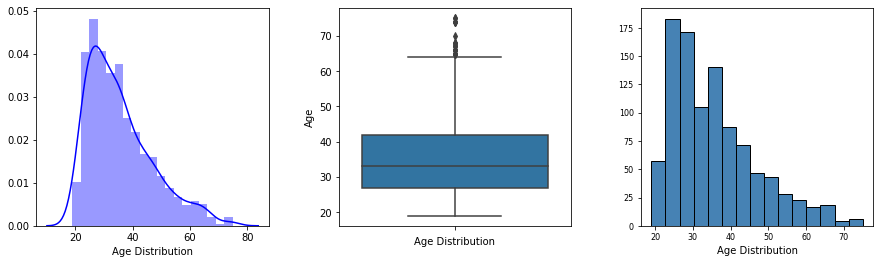

In [24]:
numerical_plots(df.Age)

The plots show that people aged between 20 to 40 tend to apply for credits more as compared to other age groups.
<br>Among the customers who applied for credit, 50% or less were aged around 35 years.


#### 5.1.2.Sex Attribute

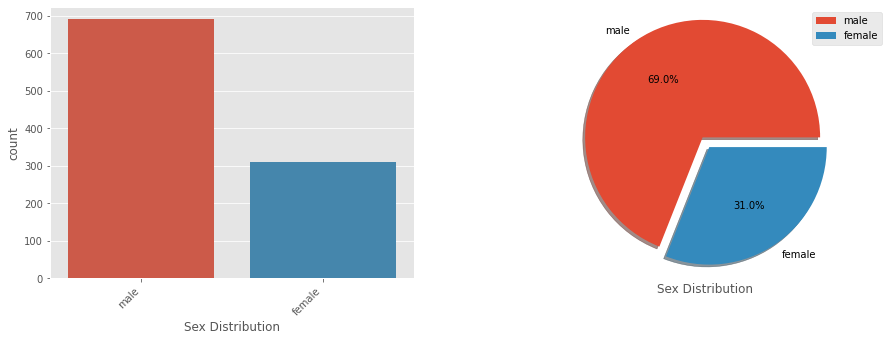

In [25]:
categorical_plots(df.Sex, df)

The plot shows that males apply more than female. Our data shows that 69% of the people who applied for credit were male, while female were 31%.

#### 5.1.3. Job Attribute

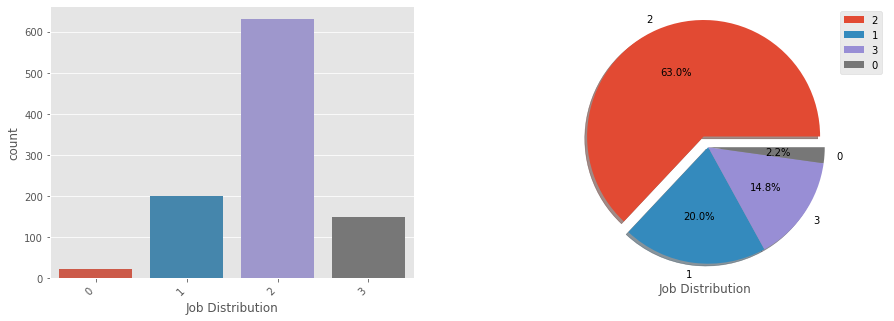

In [26]:
categorical_plots(df.Job,df)

From 1000 people who applied for loan, highly skilled people were more than 600. That accounts for 63% of the total people who applied for credit.


#### 5.1.4. Housing Attribute

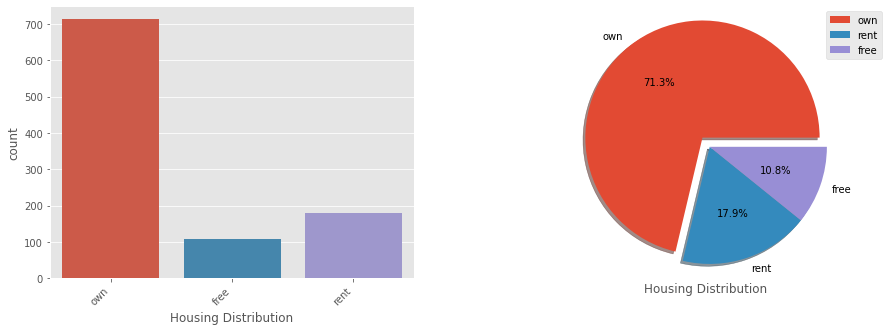

In [27]:
categorical_plots(df.Housing,df)

Customers who have their own properties/houses are in greater number who apply for loan.

#### 5.1.5. Saving Accounts attribute

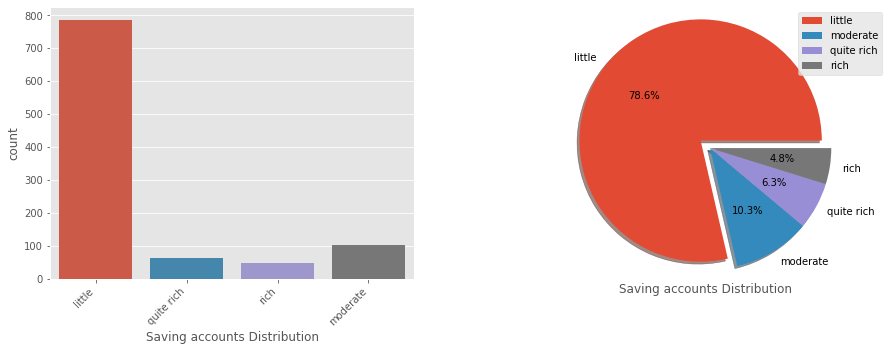

In [28]:
categorical_plots(df['Saving accounts'],df)

The plot shows that people who have little savings apply for loan more often as compared to people who have better or more savings.

#### 5.1.6. Checking account

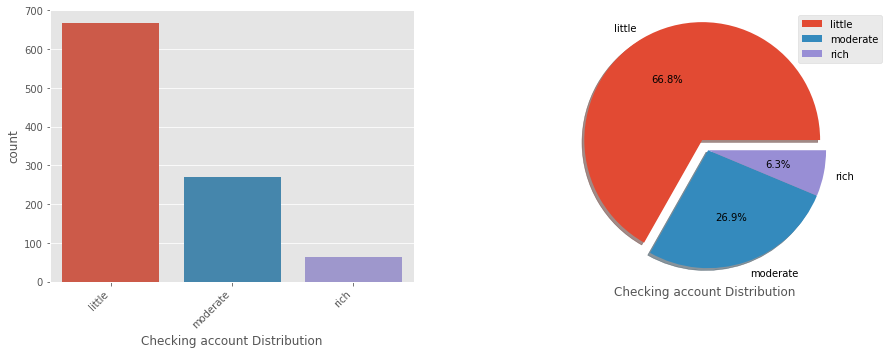

In [29]:
categorical_plots(df['Checking account'],df)

People who have little amount in their checking accounts are the one in greater number who applied for loan.

#### 5.1.7. Credit Amount

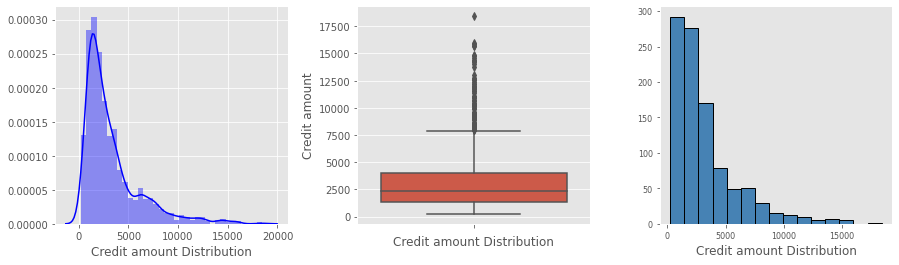

In [30]:
numerical_plots(df['Credit amount'])

The distribution shows that aplications for credit amount less than 5000 are more as compared to higher loan applications.
<br> Around 50% application were for credit amount =2500

#### 5.1.8. Duration attribute

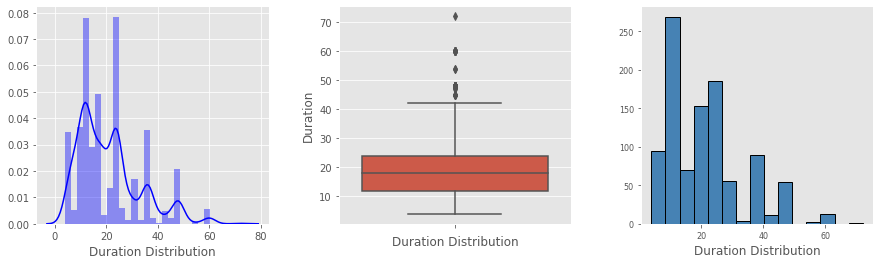

In [31]:
numerical_plots(df.Duration)

The distribution shows that majority of the application are loan are for a duration between 10-25 months.

#### 5.1.9. Purpose Attribute

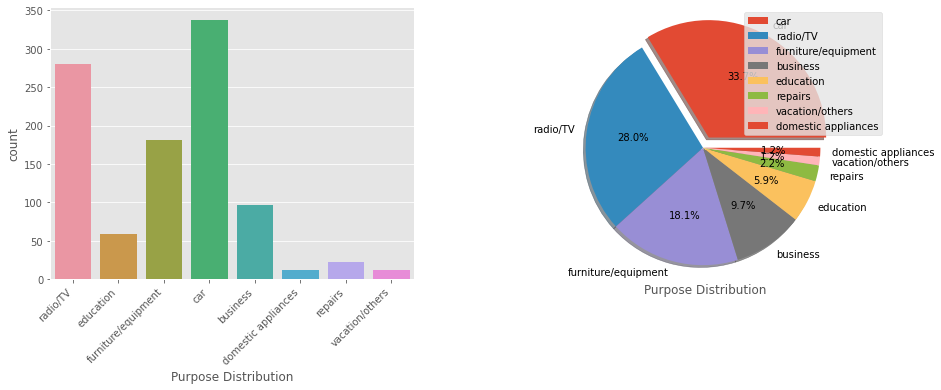

In [32]:
categorical_plots(df.Purpose,df)

The plots clearly show that most of the loan applications are for buying cars. That accounts for 33.7% application. Interestingly the second most common purpose for loan is radio/TV.

#### 5.1.10. Risk Attribute

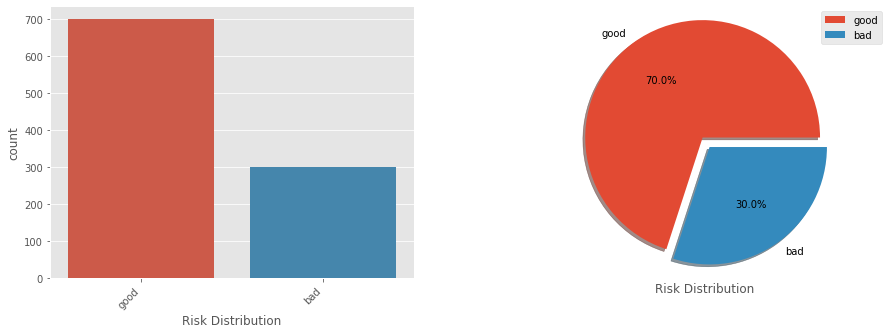

In [33]:
categorical_plots(df.Risk,df)

Around 70% of the total application were classified as good risk. 

## 6. BiVariate Analysis

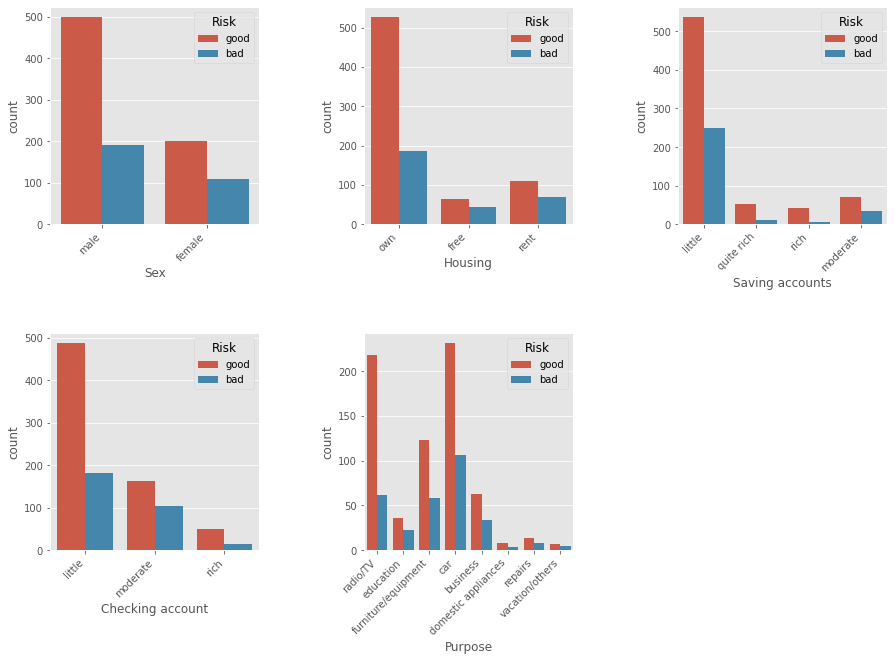

In [34]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

c=1
for i in df.columns:
    if df[i].dtype =='O' and i!='Risk':
        plt.subplot(2,3,c)
        sns.countplot(x=df[i], hue=df.Risk, data=df)
        plt.xticks(rotation = 45, horizontalalignment='right')
        c+=1
plt.show()

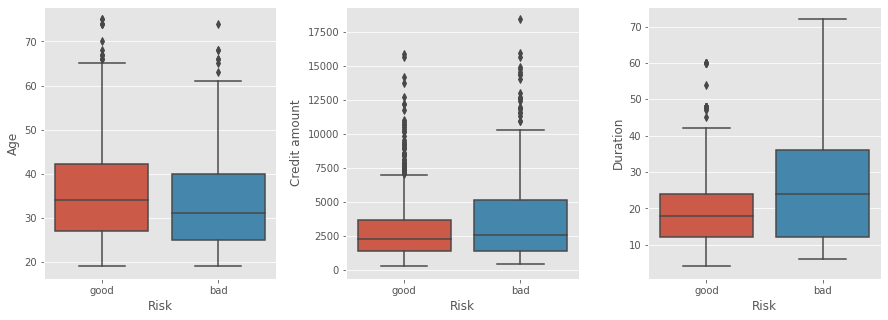

In [35]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace=0.3)

c=1
for i in df.columns:
    if df[i].dtype !='O' and i!='Job':
        plt.subplot(1,3,c)
        sns.boxplot(y=df[i], x=df.Risk)
        #plt.xticks(rotation = 45, horizontalalignment='right')
        c+=1
plt.show()
#for i in df.columns:
 #   if df[i].dtype !='O':
  #      sns.boxplot(y=df[i], x=df.Risk)
   #     plt.show()

A credit loan aplication of amount greater than 3000 will have more probability of being a Bad Risk as compared to Good.
<br>When a loan is taken for a duration greater than 25 months then the probability of being a Bad Risk is high as compared to being Good.


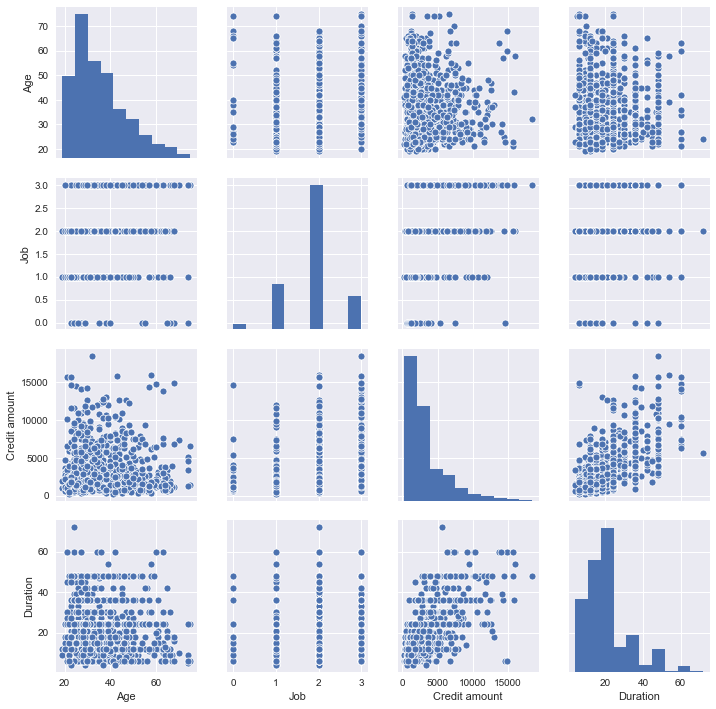

In [36]:
plt.style.use('seaborn')
sns.pairplot(df)

<b>From the plots we can observe:
    <br>With an increase in age(>45) the number of credit applications decreases.
    <br>Similarly, middle aged and old aged customers tend to apply for loan applications for shorter durations compared to adults.
    

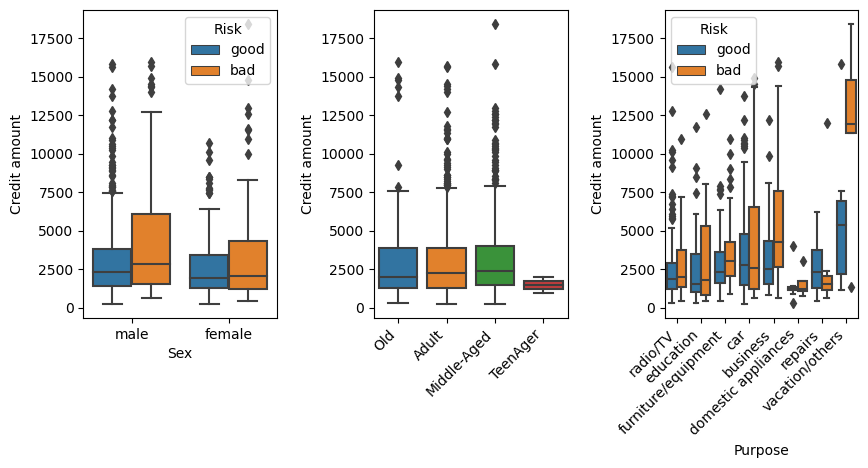

In [37]:
plt.style.use('default')

fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(wspace=0.5)

plt.subplot(1,3,1)
sns.boxplot(x=df.Sex,y=df['Credit amount'], hue=df.Risk, data=df)

#Age2=np.where(df.Age)
Age2 = np.where((df.Age<20),'TeenAger', np.where((df.Age>=20) & (df.Age<=30),'Adult',np.where((df.Age>30) & (df.Age<=50),'Middle-Aged','Old')))
plt.subplot(1,3,2)
sns.boxplot(x=Age2,y=df['Credit amount'], data=df)
plt.xticks(rotation=45, horizontalalignment='right');

plt.subplot(1,3,3)
sns.boxplot(x=df.Purpose,y=df['Credit amount'], hue=df.Risk, data=df)
plt.xticks(rotation=45, horizontalalignment='right');

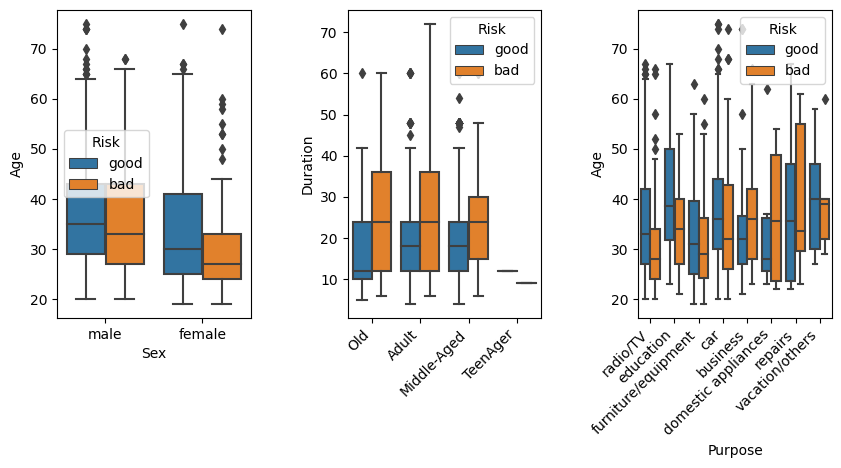

In [38]:
plt.style.use('default')

fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(wspace=0.5)

plt.subplot(1,3,1)
sns.boxplot(x=df.Sex,y=df['Age'], hue=df.Risk, data=df)

#Age2=np.where(df.Age)
#Age2 = np.where((df.Age<20),'TeenAger', np.where((df.Age>=20) & (df.Age<=30),'Adult',np.where((df.Age>30) & (df.Age<=50),'Middle-Aged','Old')))
plt.subplot(1,3,2)
sns.boxplot(x=Age2,y=df['Duration'], hue=df.Risk, data=df)
plt.xticks(rotation=45, horizontalalignment='right');

plt.subplot(1,3,3)
sns.boxplot(x=df.Purpose,y=df['Age'], hue=df.Risk, data=df)
plt.xticks(rotation=45, horizontalalignment='right');

## 7. <b>Summary:</b>

People aged between 20 to 40 tend to apply for credits more as compared to other age groups. The average of people who apply for loan is 35 years.

Males apply for credits/loans more than females. 69% of the people who applied for credit were male, while female were 31%.

From 1000 people who applied for loan, highly skilled people were more than 600. That accounts for 63% of the total people who applied for credit.

Customers who have their own properties/houses are in greater number who applied for loan.

Customers with little savings and little amounts in checking accounts apply for loan more often as compared to people who have better or more savings.

Aplications for credit amount less than 5000 are more as compared to higher loan applications.

The max Credit amount granted to customer was 18424 while minimum was 250. The average credit amount granted was 3271. </b>

Majority of the application for loan are for a duration of 10-25 months.

Most of the loan applications are for cars. That accounts for 33.7% application. Interestingly the second most common purpose for loan is radio/TV.

A credit loan aplication of amount greater than 3000 will have more probability of being a Bad Risk as compared to Good.

When a loan is taken for a duration greater than 25 months then the probability of being a Bad Risk is high as compared to being Good.

## 8. Correlation of Variables 

In [39]:
df.Risk = np.where(df.Risk =='good',1,0)

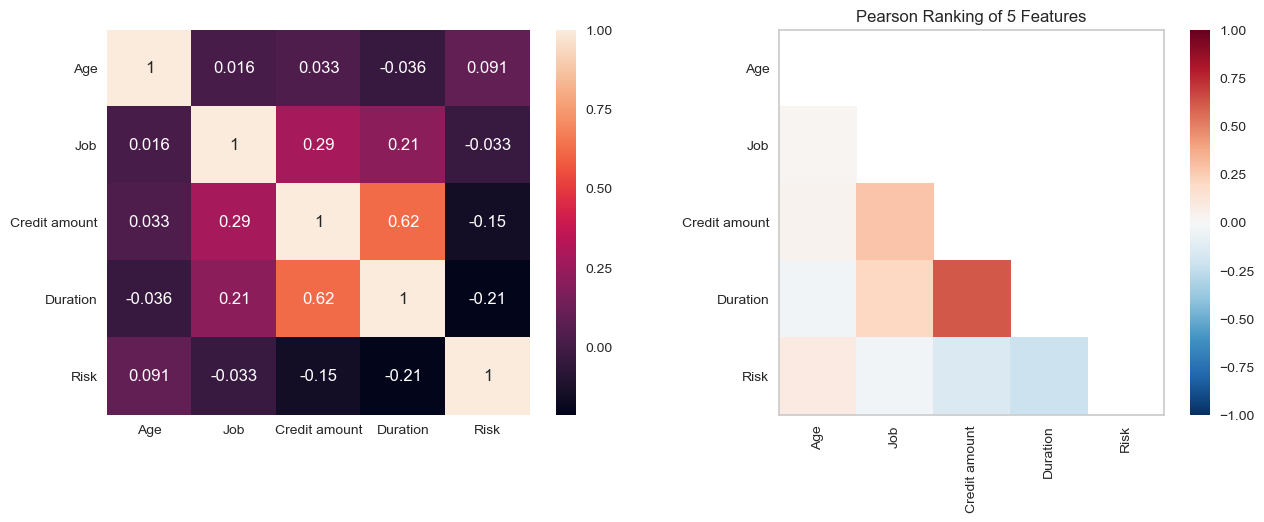

In [40]:
from yellowbrick.features import rank1d, rank2d

fig, axes = plt.subplots(1, 2,figsize=(15,5))

#heatmap using seaborn
corr = df.corr()
plt.subplot(1,2,1)
sns.heatmap(corr, annot=True)

#2 dimensional Ranking using yellow brick
df2 =df.drop(columns=['Sex','Housing','Saving accounts','Checking account','Purpose'])
rank2d(df2, ax=axes[1]);

<b> 1. Credit amount and Duration attributes have a strong postive relationship. Greater the credit amount, greater will be the duration.
    
<br>2. Credit amount and Duration show a negative correlation with the target variabe Risk i.e. Larger credit loan applications may have higher probabilty of risk compared to smaller.

<br>3. Similarly larger duration of loan tend towards Bad Risk applications.</b>

## 9. Chi Square Statistics

In [41]:
import scipy.stats as s

def chi2(data,target,alpha):
    
    for i in df.columns:
    
        if df[i].dtype == 'O' and i != target:
            col = i

            ov = pd.crosstab(data[col], data[target])
            #max_least_income = ov.loc[ov[' <=50K'].idxmax()].name
            #max_highest_income = ov.loc[ov[' >50K'].idxmax()].name
            plt.style.use('ggplot')
            ov.plot(kind='bar', figsize=(5,5), stacked=True)
            plt.xlabel(i.title())
                 
            chi = s.chi2_contingency(ov)
            chi2_s = chi[0]
            p_value = chi[1]
            dof = chi[2]
            critical_value = s.chi2.ppf(q=1-alpha, df=dof)
            
            print('\n\033[1m\033[4m', col.upper(),':\033[0m \n')
            print('Significance Level = ', alpha)
            print('Degree of Freedom = ', dof)
            print('chi2 = ', chi2_s)
            print('Critical Value = ',critical_value)
            print('p-value = ', p_value)

            if chi2_s >=critical_value or p_value <= alpha :
                print('\nWe reject the null hypotheses, there is a relationship between the two variables \n')
            else:
                print('\nThere is no relationship between the two variables and the null hypotheses is retained \n')
            
            plt.show()
            #print('\033[1mThe bar chart shows that', max_least_income,i,'has the highest number of people with <=50k income and',max_highest_income,i,'has the highest number of people having income >50K \n')


 SEX : 

Significance Level =  0.05
Degree of Freedom =  1
chi2 =  5.348516218081436
Critical Value =  3.841458820694124
p-value =  0.020739913068713305

We reject the null hypotheses, there is a relationship between the two variables 



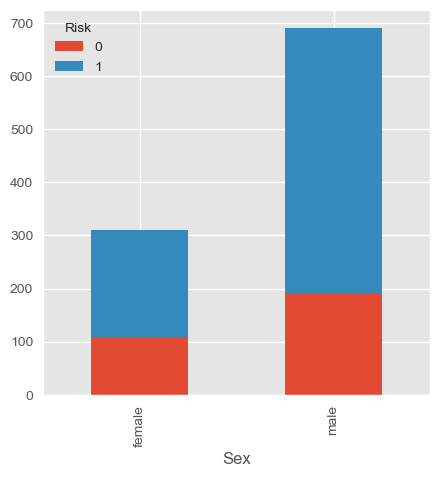


 HOUSING : 

Significance Level =  0.05
Degree of Freedom =  2
chi2 =  18.19984158256362
Critical Value =  5.991464547107979
p-value =  0.00011167465374597684

We reject the null hypotheses, there is a relationship between the two variables 



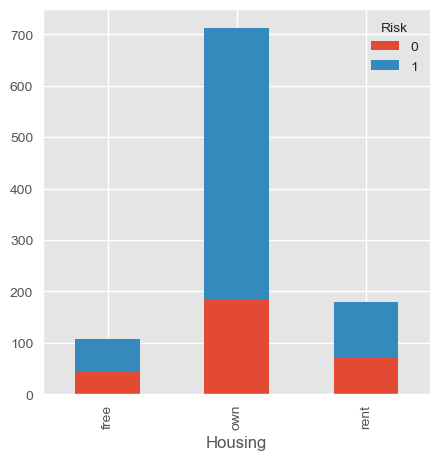


 SAVING ACCOUNTS : 

Significance Level =  0.05
Degree of Freedom =  3
chi2 =  13.217215622960401
Critical Value =  7.814727903251179
p-value =  0.004189653304672609

We reject the null hypotheses, there is a relationship between the two variables 



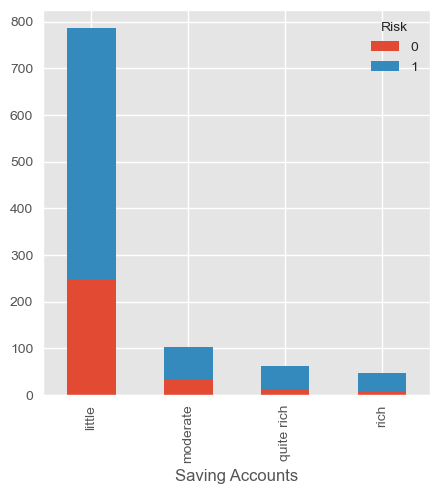


 CHECKING ACCOUNT : 

Significance Level =  0.05
Degree of Freedom =  2
chi2 =  14.950735220418903
Critical Value =  5.991464547107979
p-value =  0.0005668773394330006

We reject the null hypotheses, there is a relationship between the two variables 



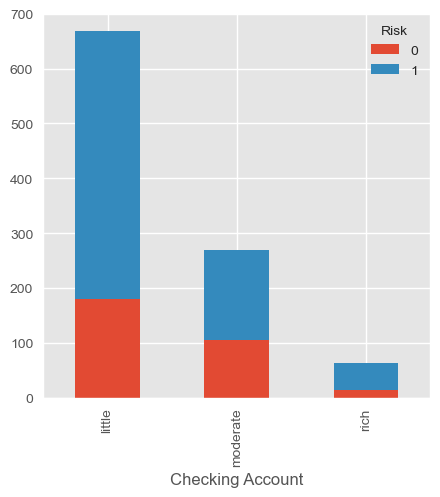


 PURPOSE : 

Significance Level =  0.05
Degree of Freedom =  7
chi2 =  13.642086296939734
Critical Value =  14.067140449340169
p-value =  0.05792591119293633

There is no relationship between the two variables and the null hypotheses is retained 



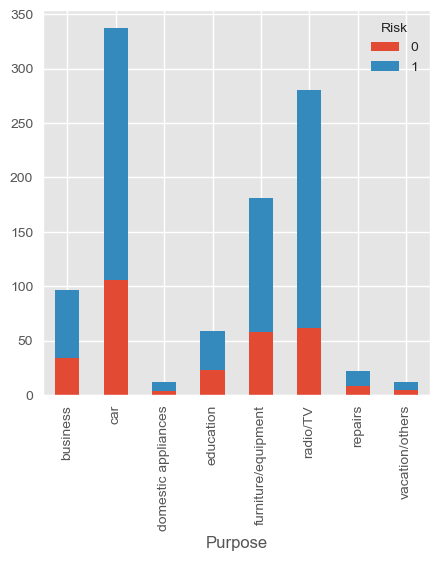

In [42]:
chi2(df, 'Risk', 0.05)

<b>All categorical variables have a relationship with the target variable except 'Purpose' attribute. Among all the related variables saving account has the highest affect on the Risk.</b>

In [43]:
df.drop(columns = ['Purpose'], inplace=True) #Since there is no relation ship with the target variable

In [44]:
df.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own          little           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little           little           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration  Risk  
0         6     1  
1        48     0  
2        12     1  
3        42     1  
4        24     0

## 10. Outliers Removal 

<b>In the univariate analysis we saw that age, credit amount and Duration attributes not only had outliers but were also positivey skewed. Therefore, before feeding the data to model we will remove reduce the skewness and remove the outliers using logarithimic transformation.

In [45]:
outliers = np.log(df[['Age', 'Duration','Credit amount']])

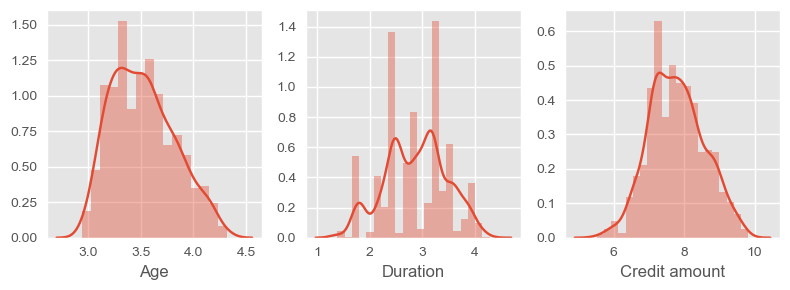

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(8,3))
sns.distplot(outliers.Age, ax=ax1)
sns.distplot(outliers.Duration, ax=ax2)
sns.distplot(outliers["Credit amount"], ax=ax3)

plt.tight_layout()

## 11. Feature Encoding & Data Normalization

#### 11.1. Manual Encoding

In [47]:
df.Sex =  np.where(df.Sex =='male',1,0)

#### 11.2. One Hot Encoding

In [48]:
df.Dummies_Housing = pd.get_dummies(df.Housing)
df.Dummies_Housing.head()

free  own  rent
0     0    1     0
1     0    1     0
2     0    1     0
3     1    0     0
4     1    0     0

In [49]:
df.Dummies_Saving = pd.get_dummies(df['Saving accounts'])
df.Dummies_Saving.head()


little  moderate  quite rich  rich
0       1         0           0     0
1       1         0           0     0
2       1         0           0     0
3       1         0           0     0
4       1         0           0     0

In [50]:
df.Dummies_Checking = pd.get_dummies(df['Checking account'])
df.Dummies_Checking.head()

little  moderate  rich
0       1         0     0
1       0         1     0
2       1         0     0
3       1         0     0
4       1         0     0

In [51]:
df = pd.concat([df,df.Dummies_Housing,df.Dummies_Saving,df.Dummies_Checking], axis=1)
df.drop(columns=['Housing', 'Saving accounts', 'Checking account'], inplace=True)
df.head()

Age  Sex  Job  Credit amount  Duration  Risk  free  own  rent  little  \
0   67    1    2           1169         6     1     0    1     0       1   
1   22    0    2           5951        48     0     0    1     0       1   
2   49    1    1           2096        12     1     0    1     0       1   
3   45    1    2           7882        42     1     1    0     0       1   
4   53    1    2           4870        24     0     1    0     0       1   

   moderate  quite rich  rich  little  moderate  rich  
0         0           0     0       1         0     0  
1         0           0     0       0         1     0  
2         0           0     0       1         0     0  
3         0           0     0       1         0     0  
4         0           0     0       1         0     0

# <center><u>12. Machine Learning</u></center>

### 12.1. Transforming Features and Target Variable into Array

In [52]:
y = df['Risk']

x = df.drop(columns=['Risk'])
x.head()

Age  Sex  Job  Credit amount  Duration  free  own  rent  little  moderate  \
0   67    1    2           1169         6     0    1     0       1         0   
1   22    0    2           5951        48     0    1     0       1         0   
2   49    1    1           2096        12     0    1     0       1         0   
3   45    1    2           7882        42     1    0     0       1         0   
4   53    1    2           4870        24     1    0     0       1         0   

   quite rich  rich  little  moderate  rich  
0           0     0       1         0     0  
1           0     0       0         1     0  
2           0     0       1         0     0  
3           0     0       1         0     0  
4           0     0       1         0     0

#### 12.1.2. Data Normalization

In [53]:
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler()

for i in x.columns:
    df[i] = zscore.fit_transform(df[[i]])

In [54]:
x = x.to_dict(orient='records')

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
x = vec.fit_transform(x).toarray()
x

array([[  67., 1169.,    6., ...,    0.,    0.,    0.],
       [  22., 5951.,   48., ...,    0.,    0.,    0.],
       [  49., 2096.,   12., ...,    0.,    0.,    0.],
       ...,
       [  38.,  804.,   12., ...,    0.,    0.,    0.],
       [  23., 1845.,   45., ...,    0.,    0.,    0.],
       [  27., 4576.,   45., ...,    0.,    0.,    0.]])

In [55]:
y =np.asarray(y)

## <u>12.3. Stratified Cross Validation</u>

<b>To cater the problems associated with class imbalance, we will use stratifed cross validation which will split data having equal portions of our target class in every split.</b>

In [56]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

for train_index, val_index in skf.split(x,y): 
    #print("Train:", train_index, "Validation:", val_index) 
    xtrain, xtest = x[train_index], x[val_index] 
    ytrain, ytest = y[train_index], y[val_index]


### 12.4. Defining Functions for evaluation

In [57]:
# Defining a function to be used for evaluation for all algorithms

from sklearn.metrics import roc_auc_score,roc_curve,scorer, classification_report, confusion_matrix
import plotly.tools as tls

def evaluation(algorithm):
    #Classification Report
    print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest,algorithm ))

    #Accuracy
    print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, algorithm))

    #conf_matrix
    conf_matrix = confusion_matrix(ytest,algorithm)


    #roc_auc_score
    model_roc_auc = round(roc_auc_score(ytest, algorithm),3) 
    print ("\033[1mArea under curve : \033[0m",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

    # roc curve plot
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    #confusion matrix plot
    trace2 = go.Heatmap(z = conf_matrix ,
                        x = ["Bad Risk ","Good Risk"],
                        y = ["Bad Risk","Good Risk"],
                        colorscale = "Viridis",name = "matrix" )
    #subplots
    fig = tls.make_subplots(rows=1, cols=2, horizontal_spacing = 0.40,subplot_titles=('ROC Curve','Confusion Matrix'))

    fig.append_trace(trace1,1,1)
    fig.append_trace(trace3,1,1)
    fig.append_trace(trace2,1,2)


    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 400,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         xaxis = dict(title = "false positive rate",
                                 gridcolor = 'rgb(255, 255, 255)',
                                 domain=[0, 0.6],
                                 ticklen=5,gridwidth=2),
                        yaxis = dict(title = "true positive rate",
                                  gridcolor = 'rgb(255, 255, 255)',
                                  zerolinewidth=1),
                        margin = dict(b = 20))

    py.iplot(fig)


In [58]:
#Defining a function using Yellow brick library to be used for evaluation

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC
from yellowbrick.features import FeatureImportances



def visualize(model):

    
    fig, axes = plt.subplots(1, 3,figsize=(15,5))
    fig.subplots_adjust(wspace=0.7)
    
    visualgrid = [
        #FeatureImportances(model,ax=axes[0][0]),
        ROCAUC(model, ax=axes[1],cmap='RdYlBu'),
        ConfusionMatrix(model,cmap='BuPu', ax=axes[2]),
        ClassificationReport(model, cmap='PuBu',ax=axes[0])
        
    ]

    for viz in visualgrid:
        viz.fit(xtrain, ytrain)
        viz.score(xtest, ytest)
        viz.finalize()

    plt.show()

## 12.5.<u> Logistic Regression</u>

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Model Training
model_LG =LogisticRegression()
model_LG.fit(xtrain, ytrain);

#Prediction
y_pred_LG = model_LG.predict(xtest)
probabilities = model_LG.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])


### Logistic Regression Evaluation Using Plotly

In [60]:
evaluation(y_pred_LG)


  Classification report : 
               precision    recall  f1-score   support

           0       0.50      0.15      0.23        60
           1       0.72      0.94      0.81       140

    accuracy                           0.70       200
   macro avg       0.61      0.54      0.52       200
weighted avg       0.65      0.70      0.64       200

Accuracy Score   :  0.7
Area under curve :  0.543


### Logistic Regression Evaluation using YellowBrick

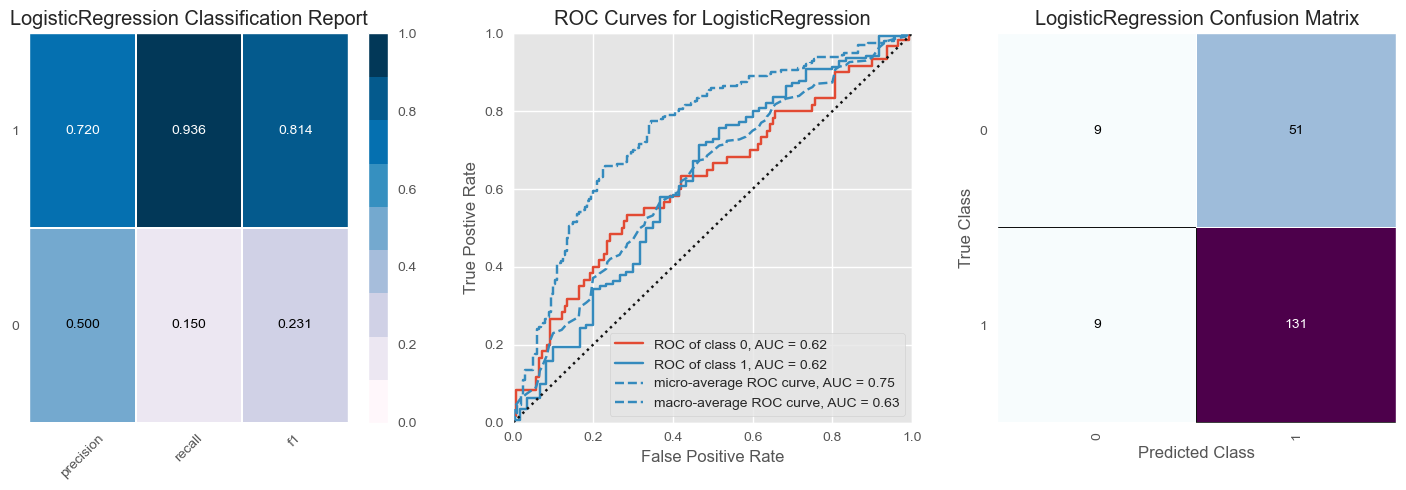

In [61]:
visualize(model_LG)

## 12.6. <u>KNN Algorithm</u>

### Applying KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

#Model Traning
model_knn = KNeighborsClassifier()
model_knn.fit(xtrain,ytrain);

#Prediction
y_pred_knn = model_knn.predict(xtest)
probabilities = model_knn.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

### KNN Evaluation Using Plotly

In [63]:
#print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_knn))
#print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_knn))
evaluation(y_pred_knn)


  Classification report : 
               precision    recall  f1-score   support

           0       0.38      0.23      0.29        60
           1       0.72      0.84      0.77       140

    accuracy                           0.66       200
   macro avg       0.55      0.53      0.53       200
weighted avg       0.62      0.66      0.63       200

Accuracy Score   :  0.655
Area under curve :  0.535


### KNN Evaluation Using YellowBrick

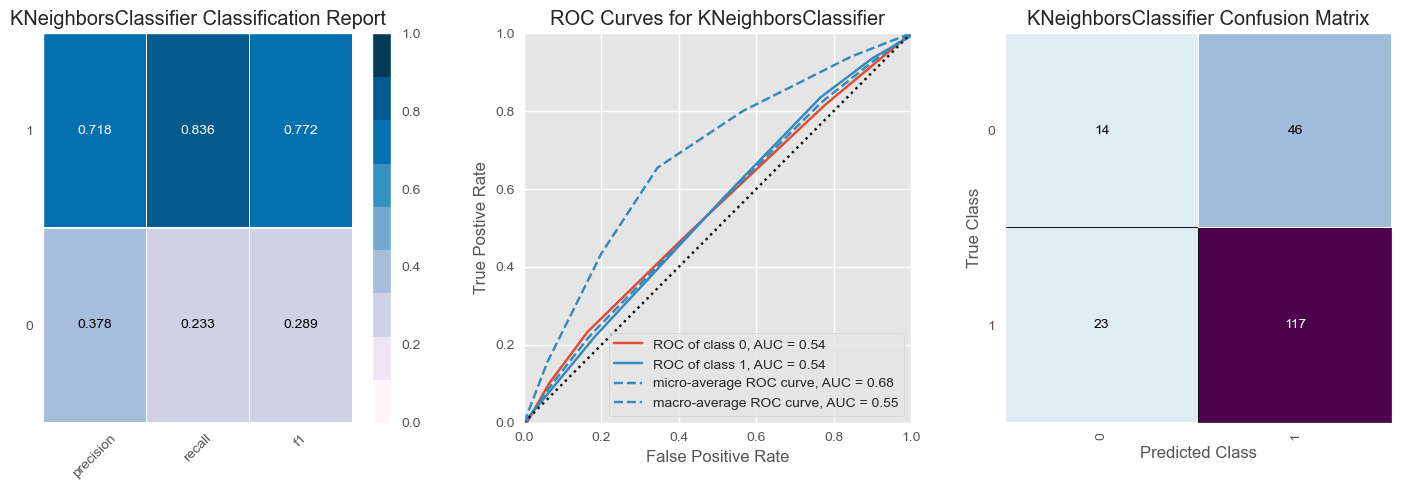

In [64]:
visualize(model_knn)

## 12.7. <u>Naive Bayes Classifier</u>

### Applying Naive Bayes Classifier

In [65]:
from sklearn.naive_bayes import GaussianNB

#Model Training
model_nb = GaussianNB()
model_nb.fit(xtrain, ytrain);

# Model Prediction
y_pred_nb = model_nb.predict(xtest)
probabilities = model_nb.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

### Naive Bayes Evaluation Using Plotly

In [66]:
evaluation(y_pred_nb)


  Classification report : 
               precision    recall  f1-score   support

           0       0.45      0.42      0.43        60
           1       0.76      0.79      0.77       140

    accuracy                           0.68       200
   macro avg       0.61      0.60      0.60       200
weighted avg       0.67      0.68      0.67       200

Accuracy Score   :  0.675
Area under curve :  0.601


### Naive Bayes Evaluation using YellowBrick

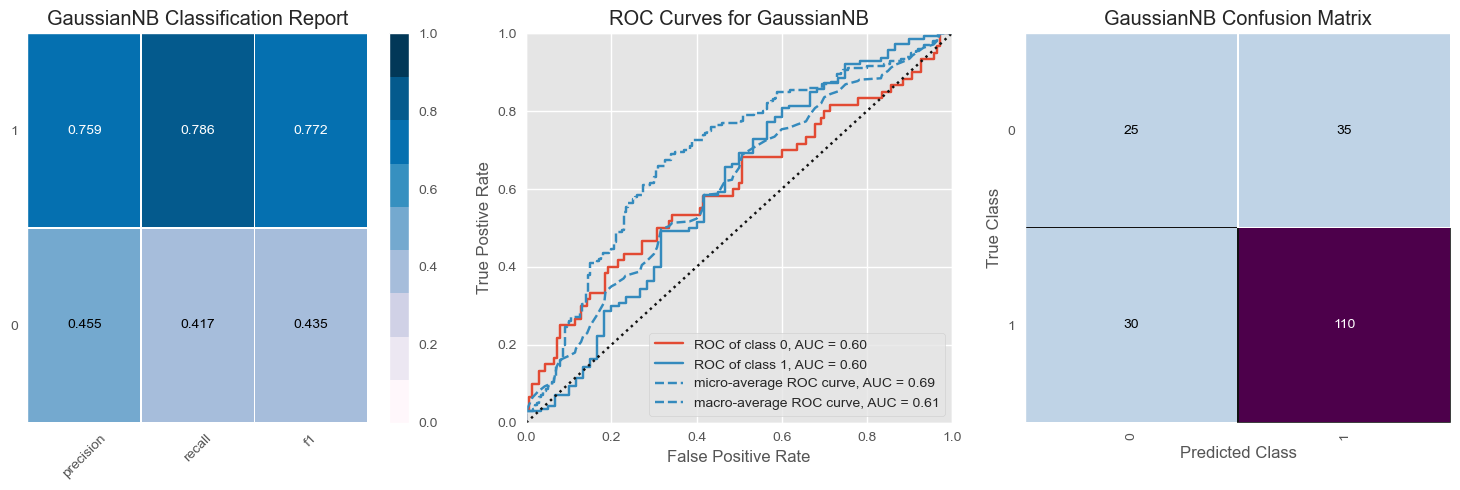

In [67]:
visualize(model_nb)

## 12.8. <u>Decision Tree Classifer</u>

### Applying Decision Tree

In [68]:
from sklearn import tree

# Model Traning
model_DT = tree.DecisionTreeClassifier()
model_DT.fit(xtrain,ytrain)

#Predictions
y_pred_DT = model_DT.predict(xtest)
probabilities = model_DT.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

### Decision Tree Evaluation Using Plotly

In [69]:
evaluation(y_pred_DT)


  Classification report : 
               precision    recall  f1-score   support

           0       0.33      0.33      0.33        60
           1       0.71      0.71      0.71       140

    accuracy                           0.59       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.60      0.59      0.60       200

Accuracy Score   :  0.595
Area under curve :  0.52


### Decision Tree Evaluation Using YellowBrick

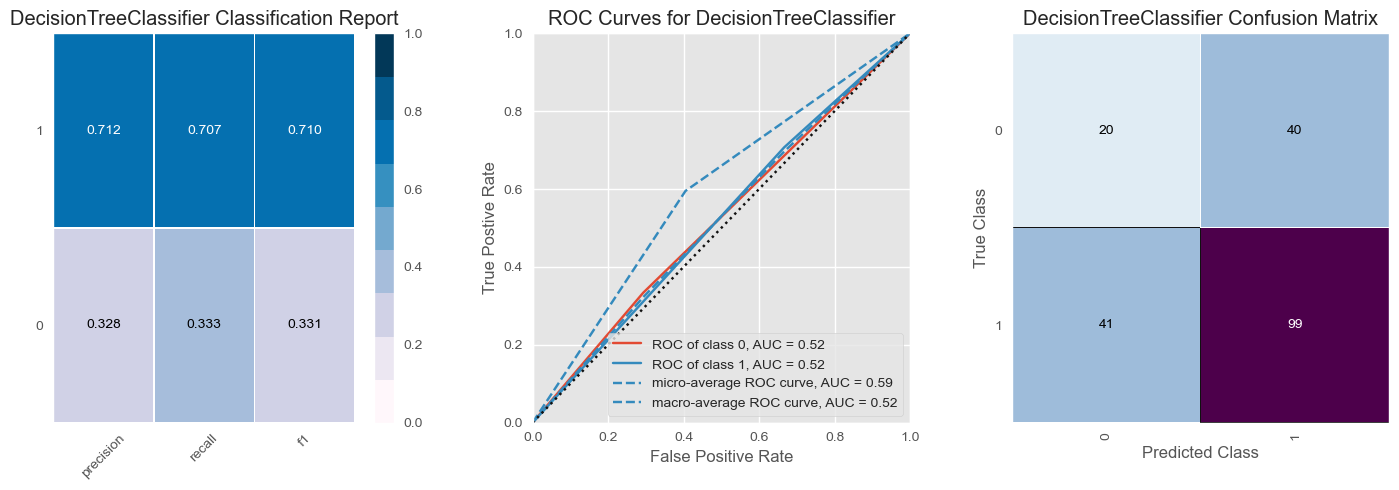

In [70]:
visualize(model_DT)

## 12.9. <u>Random Forest Classifier</u>

In [71]:
from sklearn.ensemble import RandomForestClassifier
#Model Training
model_rfc = RandomForestClassifier()
model_rfc.fit(xtrain, ytrain);

#Prediction
y_pred_rfc = model_rfc.predict(xtest)
probabilities = model_rfc.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

### Random Forest Classifier Evaluation Using Plotly:

In [72]:
evaluation(y_pred_rfc)


  Classification report : 
               precision    recall  f1-score   support

           0       0.44      0.33      0.38        60
           1       0.74      0.82      0.78       140

    accuracy                           0.68       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.65      0.68      0.66       200

Accuracy Score   :  0.675
Area under curve :  0.577


### Random Forest Classifier Evaluation Using Yellow Brick

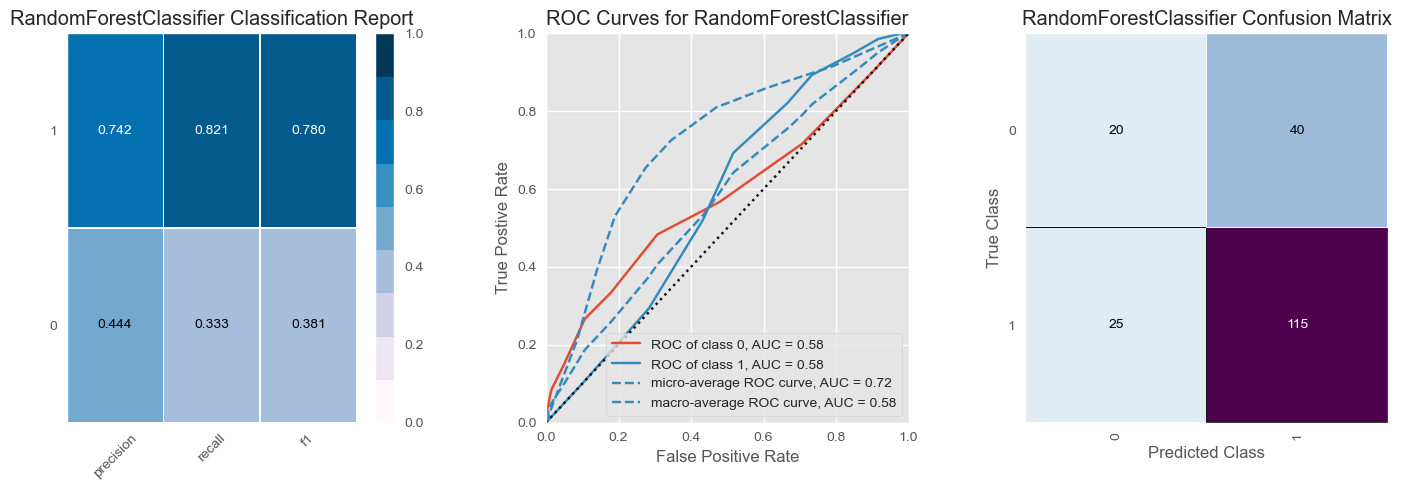

In [73]:
visualize(model_rfc)

## 12.10. <u>XGBoost</u>

In [74]:
import xgboost as xgb

#Model Training
model_xgb  = xgb.XGBClassifier()
model_xgb.fit(xtrain, ytrain);

#Prediction
y_pred_xgb = model_xgb.predict(xtest)
probabilities = model_xgb.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

### XGBoost Evaluation Using Plotly:

In [75]:
#print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_xgb))
#print ("\n \033[1m Accuracy : \033[0m\n",metrics.accuracy_score(ytest, y_pred_xgb))
evaluation(y_pred_xgb)


  Classification report : 
               precision    recall  f1-score   support

           0       0.36      0.23      0.28        60
           1       0.71      0.82      0.76       140

    accuracy                           0.65       200
   macro avg       0.54      0.53      0.52       200
weighted avg       0.61      0.65      0.62       200

Accuracy Score   :  0.645
Area under curve :  0.527


### XGBoost Evaluation Using YellowBrick

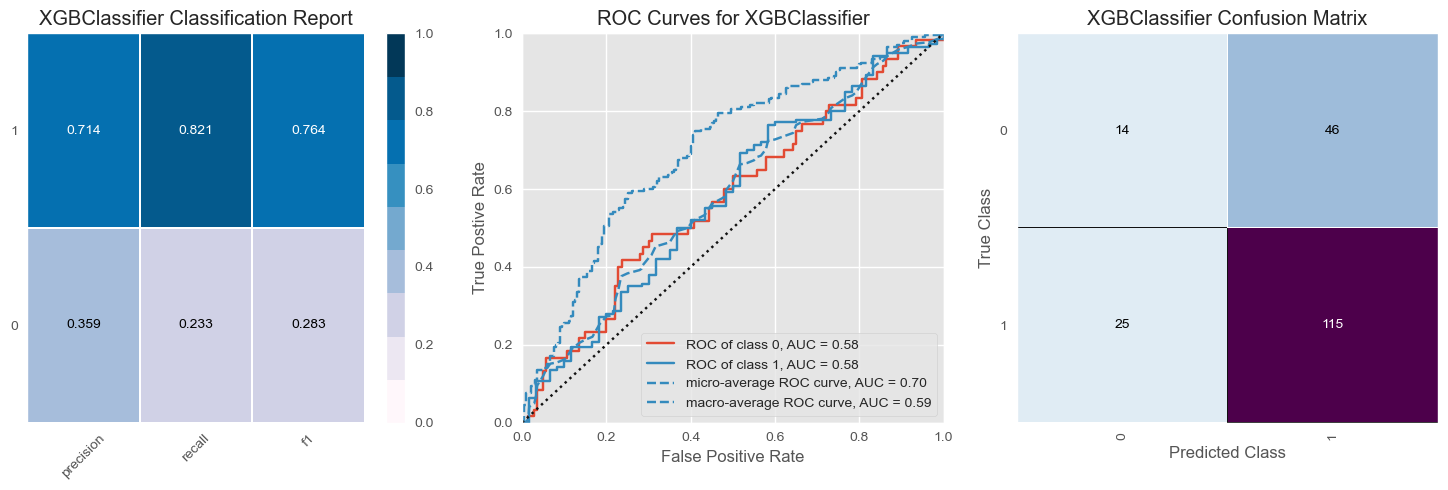

In [76]:
visualize(model_xgb)

## 12.11. <u>AdaBoost Classifier</u>

In [77]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Model Training
model_adaboost = AdaBoostClassifier()
model_adaboost.fit(xtrain, ytrain);

#Prediction
y_pred_ada = model_adaboost.predict(xtest)
probabilities = model_adaboost.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])


### AdaBoost Evaluation Using Plotly:

In [78]:
evaluation(y_pred_ada)


  Classification report : 
               precision    recall  f1-score   support

           0       0.42      0.18      0.26        60
           1       0.72      0.89      0.80       140

    accuracy                           0.68       200
   macro avg       0.57      0.54      0.53       200
weighted avg       0.63      0.68      0.63       200

Accuracy Score   :  0.68
Area under curve :  0.538


### AdaBoost Evaluation Using Yellow Brick:

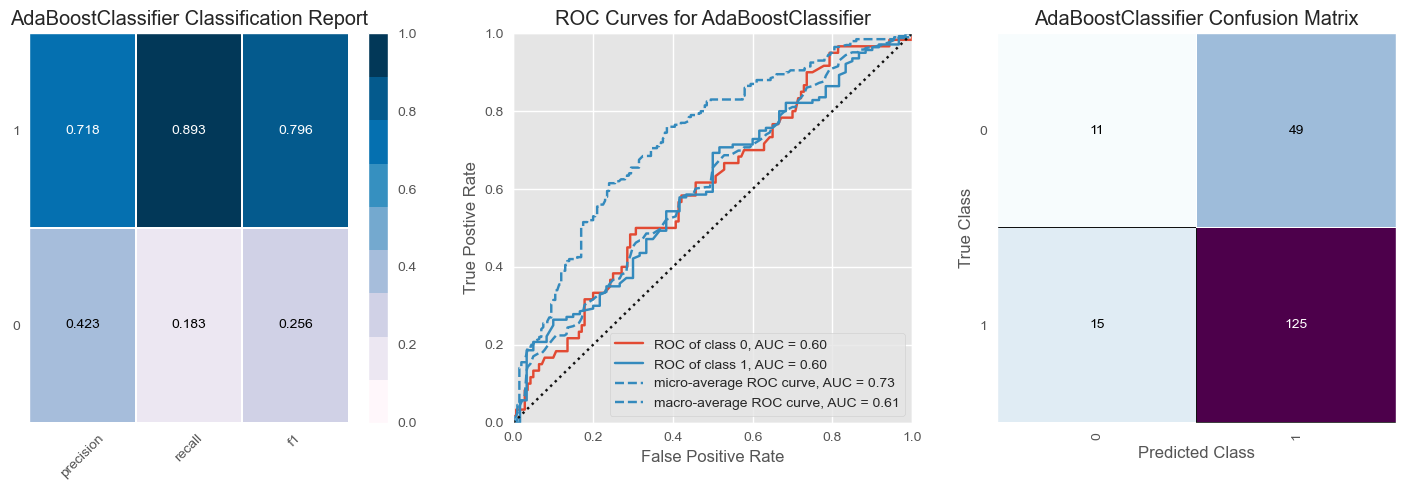

In [79]:
visualize(model_adaboost)

## 13. Model Metrics Comparision

In [80]:
from sklearn.metrics import f1_score

def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    roc_auc      = roc_auc_score(testing_y,predictions)
    
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "roc-auc"         : [roc_auc]
                      })
    return df

model1 = model_report(model_LG,xtrain,xtest,ytrain,ytest,
                      "Logistic Reg. ")


model2 = model_report(model_rfc,xtrain,xtest,ytrain,ytest,
                     "Random Forest Classifier")


model3 = model_report(model_xgb,xtrain,xtest,ytrain,ytest,
                     "XGBoost.")

model4 = model_report(model_knn,xtrain,xtest,ytrain,ytest,
                      "KNN Classifier")

model5 = model_report(model_nb,xtrain,xtest,ytrain,ytest,
                      "Naive Bayes")

model6 = model_report(model_DT,xtrain,xtest,ytrain,ytest,
                      "Decision Tree")

model7 = model_report(model_adaboost,xtrain,xtest,ytrain,ytest,
                      "AdaBoost")


model_performances = pd.concat([model1,model4,model6,model5,model2, model3, model7],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

# <center>14. <u> Hyper Parameter Tunning</u></center>

#### <b>We will be utilizing GridSearch to find best parameters for our model and train our model on the best found hyperparamters. 

<b><br>Then we will plot validation curve of any one paramaters for range of hypermaters for every model. 
    
   <br>And lastly we will plot learning curves for every model to see if more data provided to the model will result in better performance or not.
    

In [81]:
from sklearn.model_selection import GridSearchCV
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import validation_curve

In [82]:
#We will define three functions: One for validation curve using yellowbrick and other using scikit learn
# Third Function for Learning Curve using yellowbrick
plt.style.use('ggplot')
#Function1 (Validation Curve using Yellow Brick)

def validation(model, meter, range1):
    i=0
    fig, axes = plt.subplots(2, 2,figsize=(15,10))
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    
    cv = StratifiedKFold(n_splits=5) #To avoid class imbalance problem, using Stratified cross validation

    visualgrid = [
                ValidationCurve(model, param_name=meter,param_range = range1, cv=cv, scoring="accuracy",ax=axes[0][0]),
                
                ValidationCurve(model, param_name= meter, param_range= range1, cv=cv, scoring="precision",ax=axes[0][1]),
             
                ValidationCurve(model, param_name= meter, param_range= range1, cv=cv, scoring="recall",ax=axes[1][0]),
                
                ValidationCurve(model, param_name= meter, param_range= range1, cv=cv, scoring="f1",ax=axes[1][1])    ]
    
    score=['Accuracy','Precision','Recall','f1']
    
    print('The plots scores are in following order\n:')
    
    for viz in visualgrid:
        print('\n',i+1,'.',score[i])
        i+=1
        viz.fit(x, y)
        viz.finalize()
            
    plt.show()


#Function3 (Learning Curve using Yellow Brick)

def learning (model):
    
    i=0
    fig, axes = plt.subplots(2, 2,figsize=(15,10))
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    
    cv = StratifiedKFold(n_splits=5) #To avoid class imbalance problem, using Stratified cross validation
    sizes = np.linspace(0.3, 1.0, 10)

    visualgrid = [
                LearningCurve(model, cv=cv, scoring="accuracy",train_sizes=sizes,ax=axes[0][0]),
                
                LearningCurve(model, cv=cv, scoring="precision",train_sizes=sizes,ax=axes[0][1]),
             
                LearningCurve(model, cv=cv, scoring="recall",train_sizes=sizes,ax=axes[1][0]),
                
                LearningCurve(model, cv=cv, scoring="f1",train_sizes=sizes,ax=axes[1][1])    ]
    
    score=['Accuracy','Precision','Recall','f1']
    
    print('The plots scores are in following order\n:')
    
    for viz in visualgrid:
        print('\n',i+1,'.',score[i])
        i+=1
        viz.fit(x, y)
        viz.finalize()
            
    plt.show()
    

In [83]:
plt.style.use('ggplot')
#Function 2 (Validation curve using scikit learn)

def validation_plots(name,algorithm, feature, range3):
    
    param_range = range3
    #np.logspace(-5, 3)

    cv = StratifiedKFold(n_splits=5) #To avoid class imbalance problem, using Stratified cross validation

    train_scores, test_scores = validation_curve(algorithm, x, y, feature, param_range=param_range, cv=cv)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with"+name)
    plt.xlabel(feature)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    #plt.xlim(-10,10)
    
    #scaling on x axis and plotting the mean score
    plt.plot(param_range, train_scores_mean, label="Training score", color="green", lw=2, linestyle='dashdot')
        
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=2, linestyle='dashdot')
        
    plt.legend(loc="best")
    
    plt.show()

## 14.1 <u> Logistic Regression</u>

In [84]:
LG= LogisticRegression(penalty='l2')
hyperparameters = {'dual':[True,False],'max_iter':[100,110,120,130,140],'C':[0.001,1.0,1.5,2.0,2.5,100]}
LG_classifier =  GridSearchCV(LG, hyperparameters, refit=True, cv=5)
LG_classifier.fit(xtrain,ytrain);
#LG.fit(X_train,y_train);

In [85]:
print("The best fit value is found out to be :" ,LG_classifier.best_params_)

The best fit value is found out to be : {'C': 0.001, 'dual': False, 'max_iter': 100}


In [86]:
y_pred_LG2 = LG_classifier.predict(xtest)
#y_pred_LG2 = LG.predict(X_test)

In [87]:
print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_LG2))
print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_LG2))


  Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.12      0.20        60
           1       0.72      0.99      0.83       140

    accuracy                           0.73       200
   macro avg       0.75      0.55      0.52       200
weighted avg       0.74      0.72      0.64       200

Accuracy Score   :  0.725


### 14.1.1. Validation Curve for Hyperameter C (Using Scikit Learn):

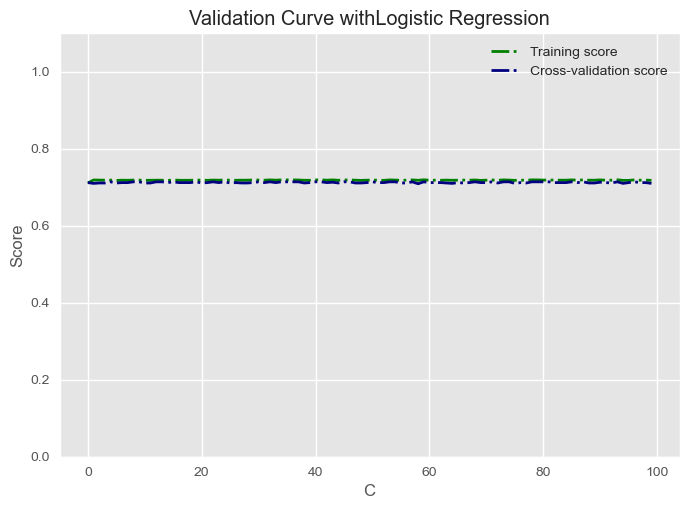

In [88]:
validation_plots('Logistic Regression',LogisticRegression(penalty='l2'),'C',np.arange(0.0001,100))

<b>The validation curve for hyperparameter C clearly shows that model is well generalized on a wide rang of values for C i.e. if we select -1 or 100, for both the values Logistic Regression will have a score af around 0.70-0.71.</b>

### 14.1.2. Validation Curves for HyperParameter C (Using YellowBrick):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


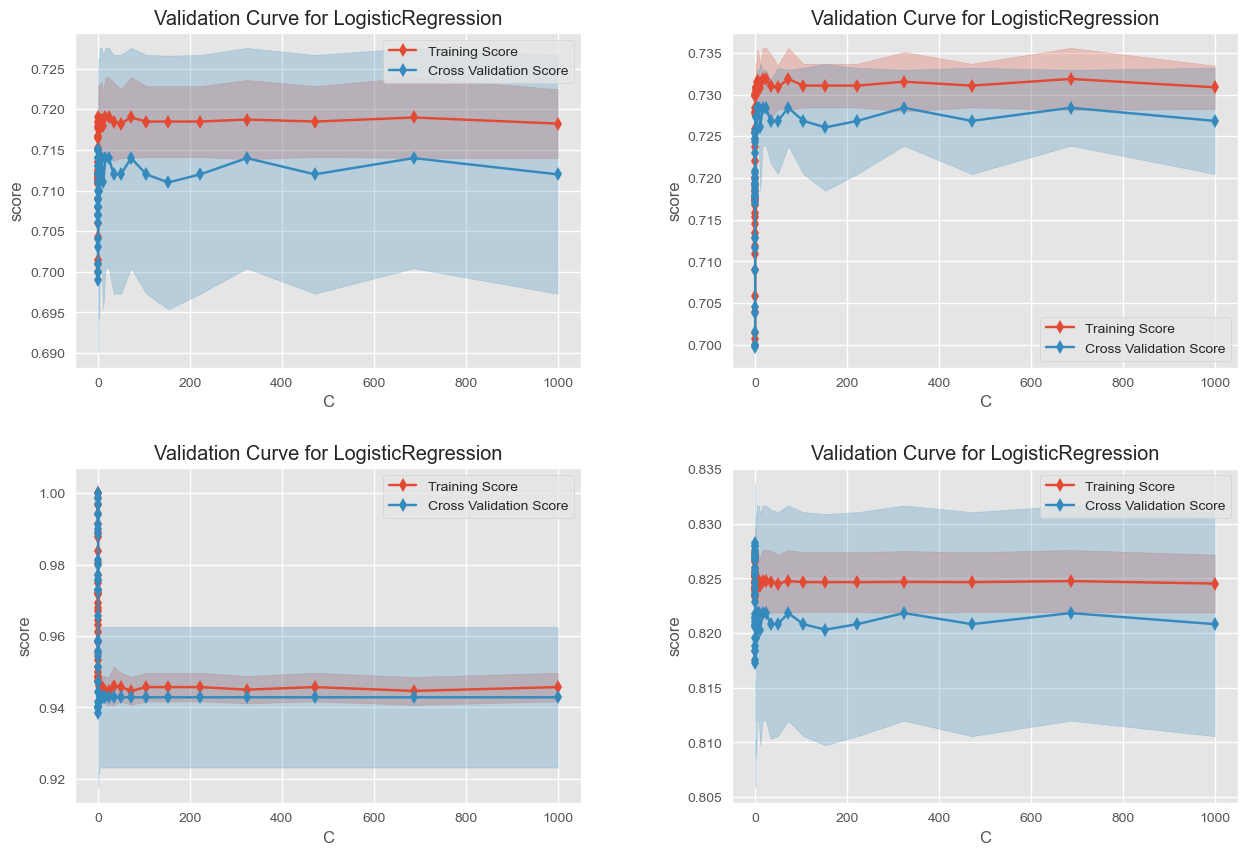

In [89]:
validation(LogisticRegression(penalty='l2'),'C',np.logspace(-5, 3))

# Following are plots with scoring in the following order:

# 1. Accuracy  2 . Precision  3. Recall  4. f1


### 14.1.3. Learning Curves for Logistic Regression (Using YellowBricks)

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


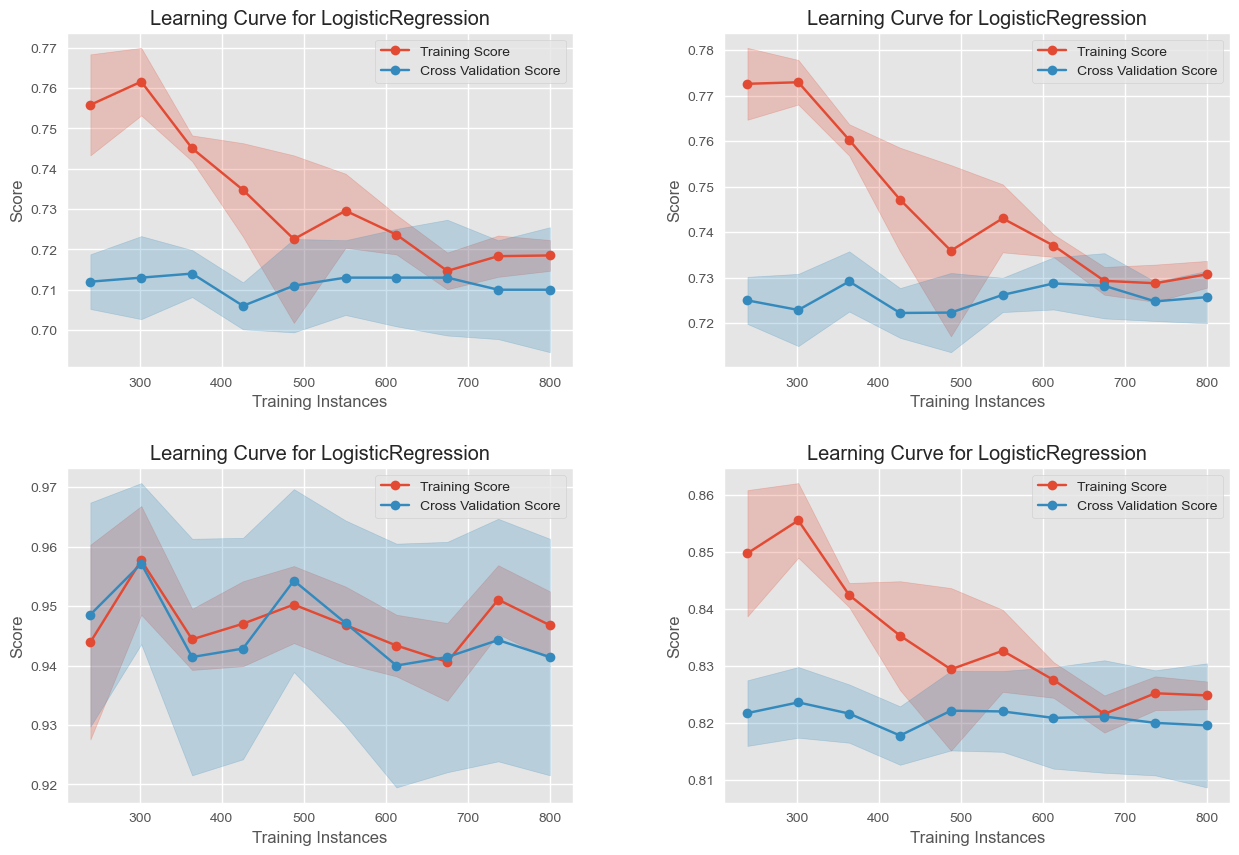

In [90]:
learning(LogisticRegression(penalty='l2'))

<b>All the 4 plots show that the training and validation score converge with increasing instances. i.e the models performace will be better as more data is provided to the model.</b>

## 14.2. <u>KNN Classifer</u>

In [91]:
knn = KNeighborsClassifier()
hyperparameters = {'n_neighbors' : list(range(1,40)), 'p':[1,2]}
knn_classifier =  GridSearchCV(knn, hyperparameters, refit=True, cv=5)
knn_classifier.fit(xtrain,ytrain);
#knn.fit(X_train,y_train);

In [92]:
print("The best fit value is found out to be :" ,knn_classifier.best_params_)

The best fit value is found out to be : {'n_neighbors': 31, 'p': 1}


In [93]:
y_pred_knn2 = knn_classifier.predict(xtest)
#y_pred_knn2 = knn.predict(X_test)

In [94]:
print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_knn2))
print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_knn2))


  Classification report : 
               precision    recall  f1-score   support

           0       0.50      0.08      0.14        60
           1       0.71      0.96      0.82       140

    accuracy                           0.70       200
   macro avg       0.61      0.52      0.48       200
weighted avg       0.65      0.70      0.62       200

Accuracy Score   :  0.7


### 14.2.1. Validation Curve for Hyperparameter n_neighbors (Using Scikit Learn):

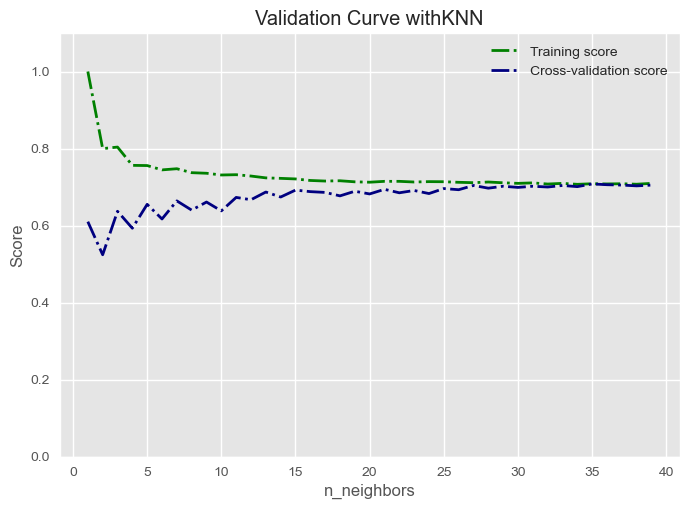

In [95]:
#Validation Curve using Scikit Learn
validation_plots('KNN',KNeighborsClassifier(),'n_neighbors',np.arange(1, 40))

<b>The Validation curve seconds the best paramter found out using gridsearch i.e. k =31 as we can see the training score and validation score converge when the number of neighbors are 31 and more.</b>

### 14.2.2. Validation Curve for Hyperparameter n_neighbors(Using YellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


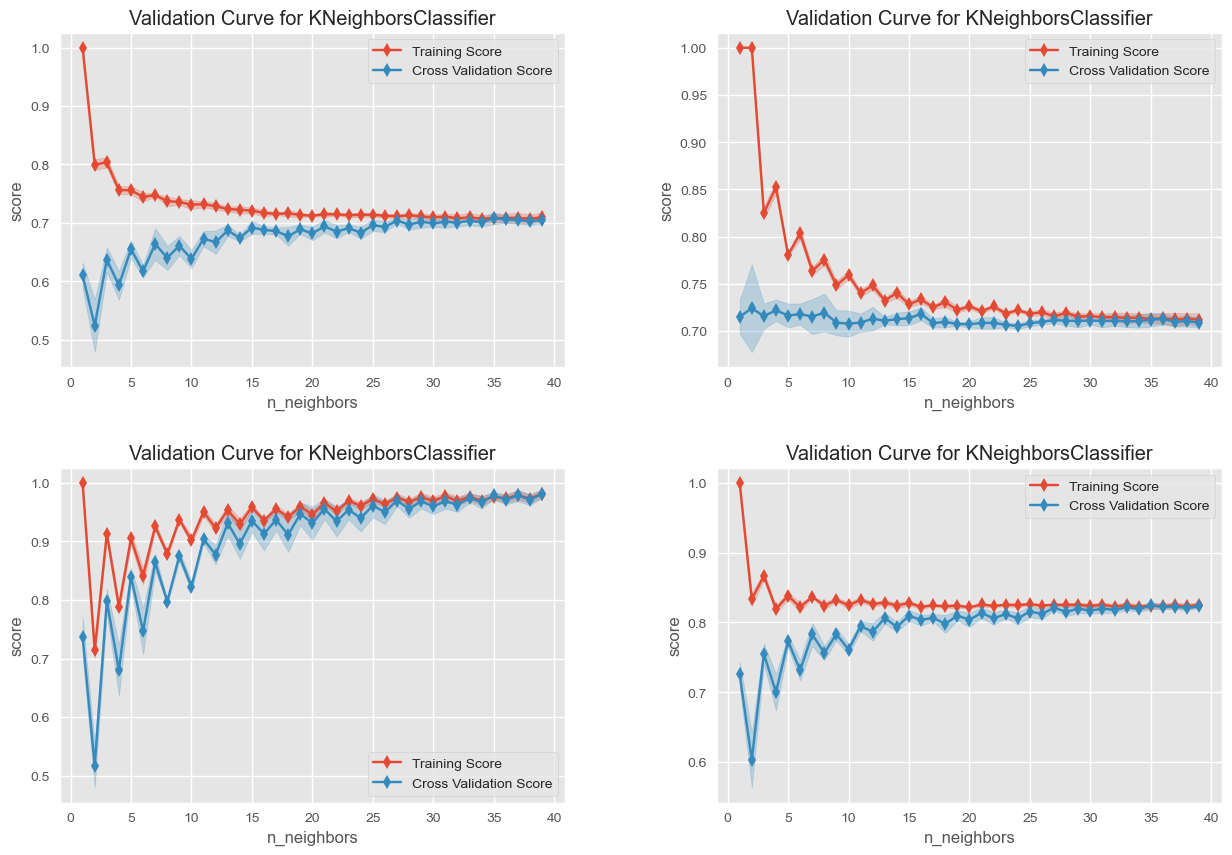

In [96]:
validation(KNeighborsClassifier(),'n_neighbors',np.arange(1, 40))

<b> Its clear from all the four plots that models performance gets better or more generalized as the number of neighbors increase.</b>

### 14.2.3. Learning Curves for KNN (Using YellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


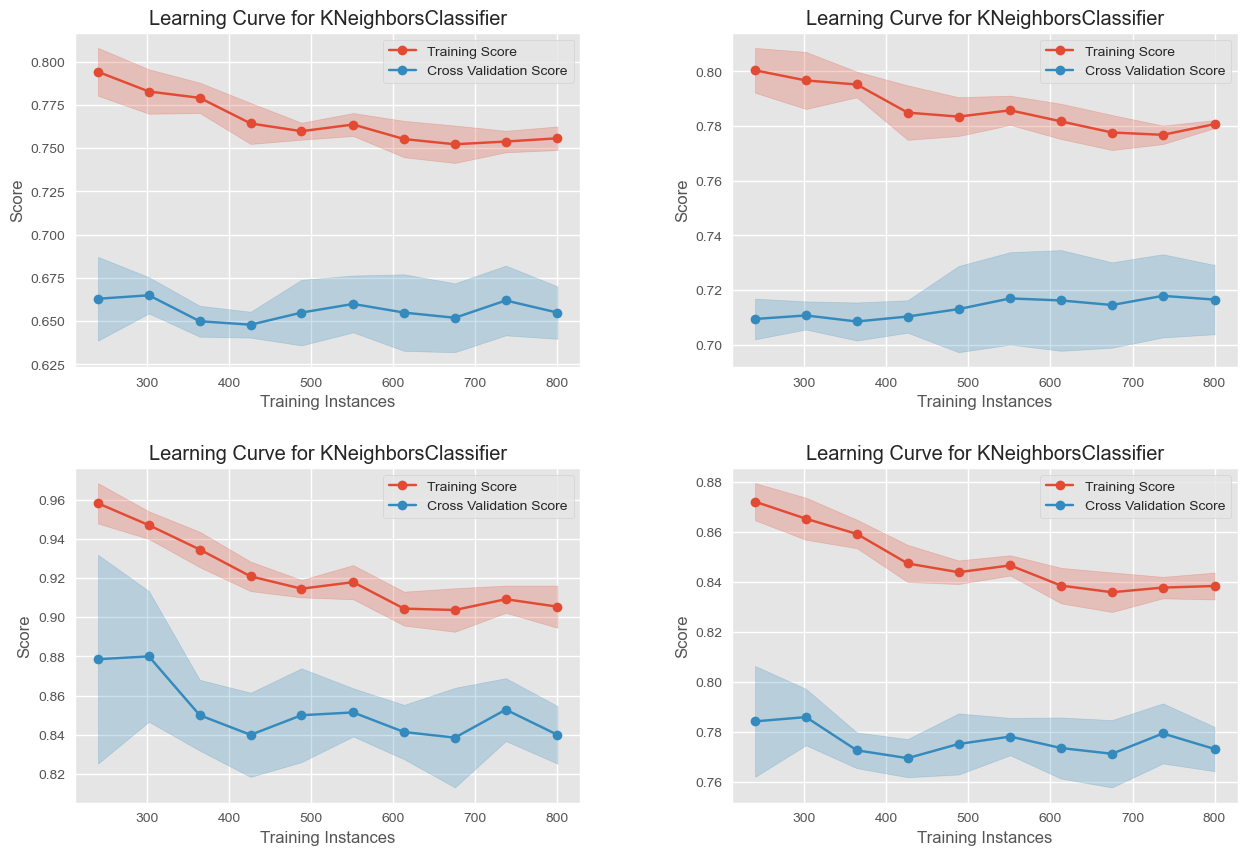

In [97]:
learning(KNeighborsClassifier())

<b> The learning curves show that the model performance will remain same even if more data is provided to the model.

## 14.3. <u>Decision Tree</u>

In [98]:
DT = tree.DecisionTreeClassifier()
hyperparameters = {'criterion' :['gini','entropy'], 'max_features':[2,4,6,8],'max_depth':[0.001,1,10, 20, 25, 30, 40, 50]},
DT_classifier =  GridSearchCV(DT, hyperparameters, refit=True, cv=5)
DT_classifier.fit(xtrain,ytrain);

In [99]:
print("The best fit value is found out to be :" ,DT_classifier.best_params_)

The best fit value is found out to be : {'criterion': 'gini', 'max_depth': 0.001, 'max_features': 2}


In [100]:
y_pred_DT2 = DT_classifier.predict(xtest)

In [101]:
print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_DT2))
print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_DT2))


  Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.70      1.00      0.82       140

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200

Accuracy Score   :  0.7


### 14.3.1. Validation Curve for HyperParameter max_depth(Using Plotly):

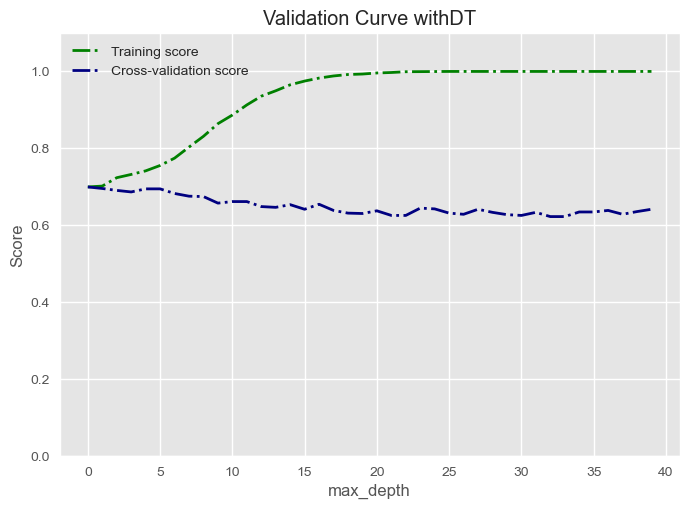

In [102]:
validation_plots('DT',tree.DecisionTreeClassifier(),'max_depth',np.arange(0.001, 40))

<b> The Validation curve shows that with increase in depth of the tree the model will tend t be overfit. With lesser depths model will generalize well.

### 14.3.2. Validation Curve for HyperParameter max_depth(Using YellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


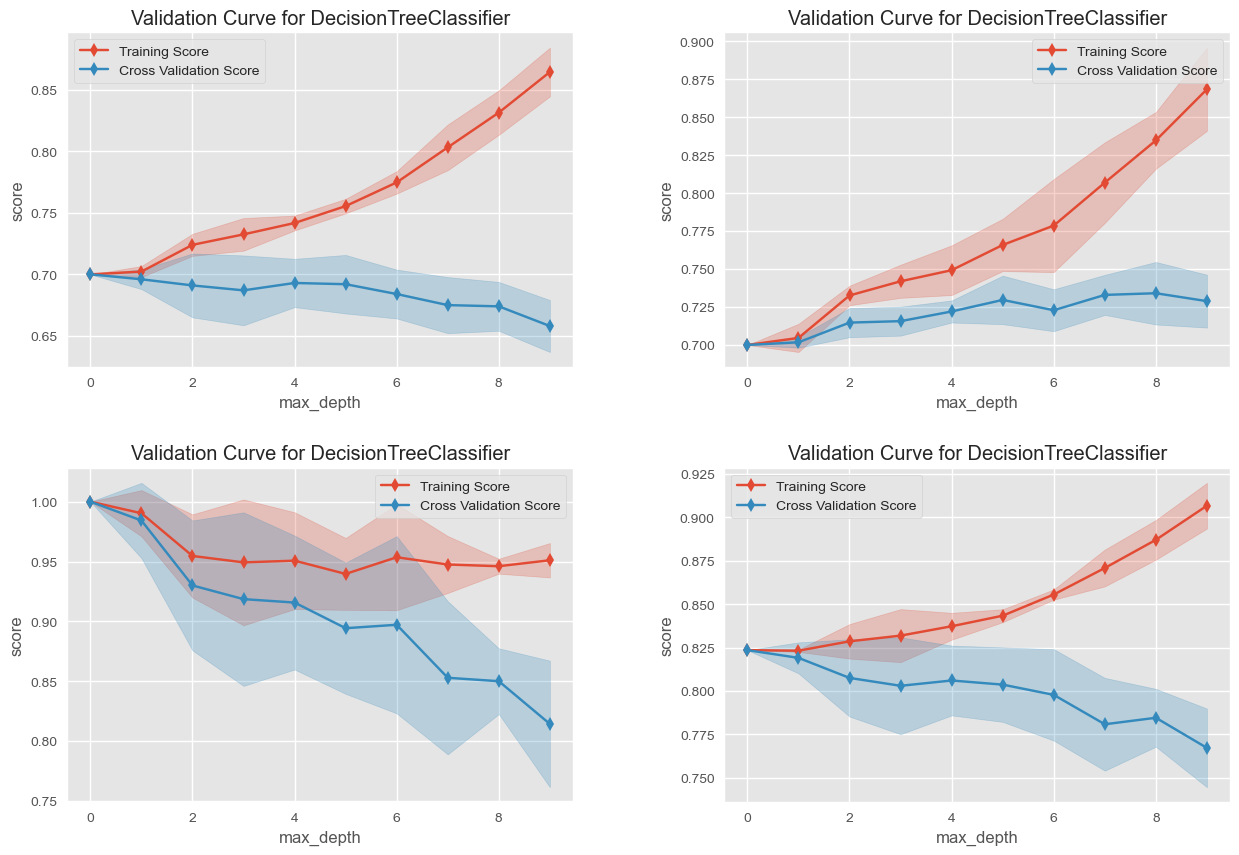

In [103]:
validation(tree.DecisionTreeClassifier(),'max_depth',np.arange(0.001, 10))

<b> All 4 curves show that increasing depth of tree will make the model overfit. The tree will be more generalized when the depth is less than 0.

### 14.3.3. Learning Curve for Decision Tree(Using YellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


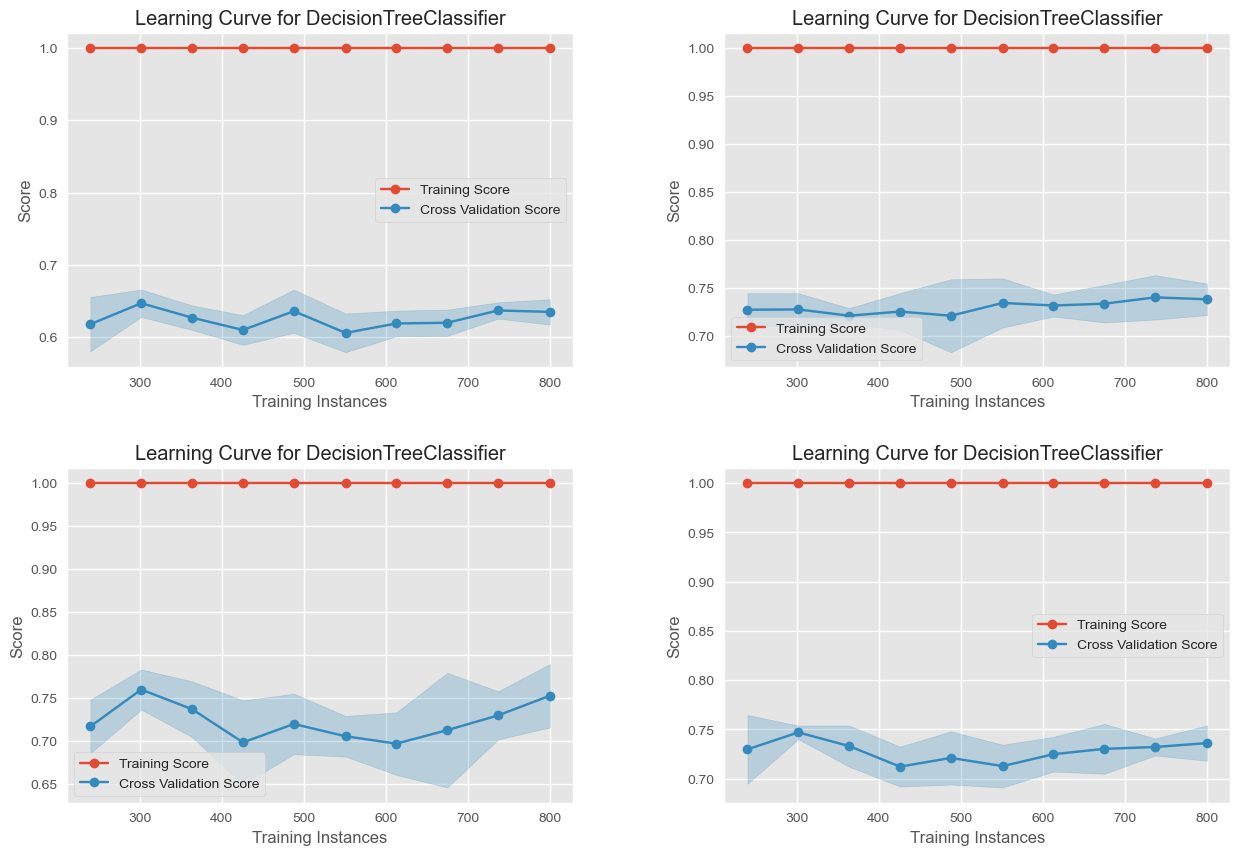

In [104]:
learning(DT)

<b> All the learning curve show that there will be no positive impact on the performance of the decision tree even if more data is provided.

## 14.4. <u>Naive Bayes</u>

In [105]:
NB = GaussianNB()
hyperparameters = {'var_smoothing':np.logspace(0,-9, num=100)}

NB_classifier =  GridSearchCV(NB, hyperparameters, refit=True, cv=5)
NB_classifier.fit(xtrain,ytrain);

In [106]:
print("The best fit value is found out to be :" ,NB_classifier.best_params_)

The best fit value is found out to be : {'var_smoothing': 1.519911082952933e-07}


In [107]:
y_pred_NB2 = NB_classifier.predict(xtest)

In [108]:
print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_NB2))
print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_NB2))


  Classification report : 
               precision    recall  f1-score   support

           0       0.43      0.25      0.32        60
           1       0.73      0.86      0.79       140

    accuracy                           0.68       200
   macro avg       0.58      0.55      0.55       200
weighted avg       0.64      0.68      0.65       200

Accuracy Score   :  0.675


### 14.4.1.Validation Curve for HyperParameter var_smoothing(Using Plotly):

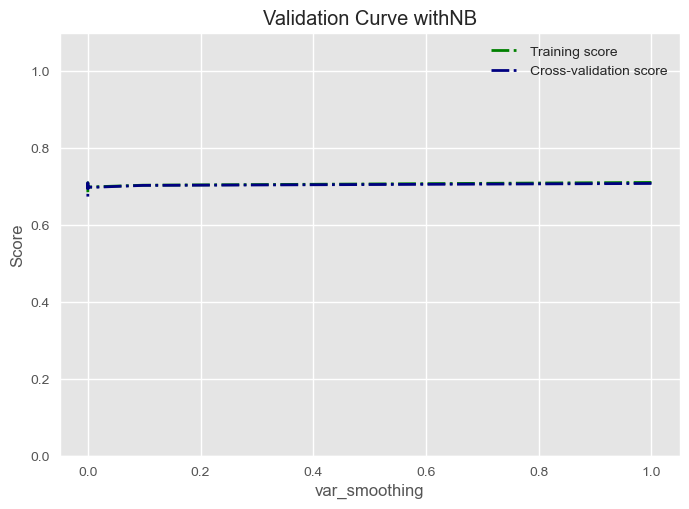

In [109]:
validation_plots('NB',GaussianNB(),'var_smoothing',np.logspace(0,-100, num=100))


### 14.4.2. Validation Curve for HyperParameter var_smoothing(Using YellowBrick):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


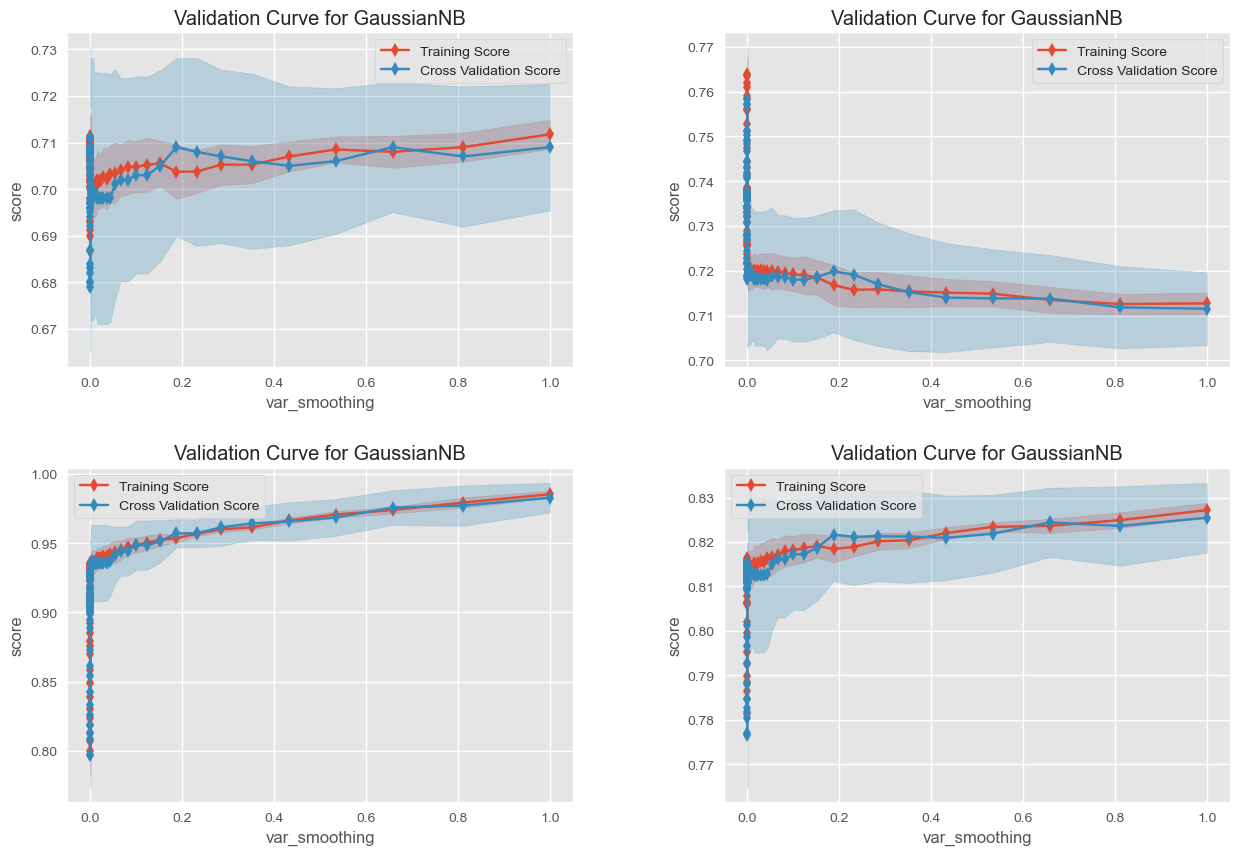

In [110]:
validation(GaussianNB(),'var_smoothing',np.logspace(0,-9, num=100))

### 14.4.3. Learning Curves for Gaussian Naive Bayes (Using YellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


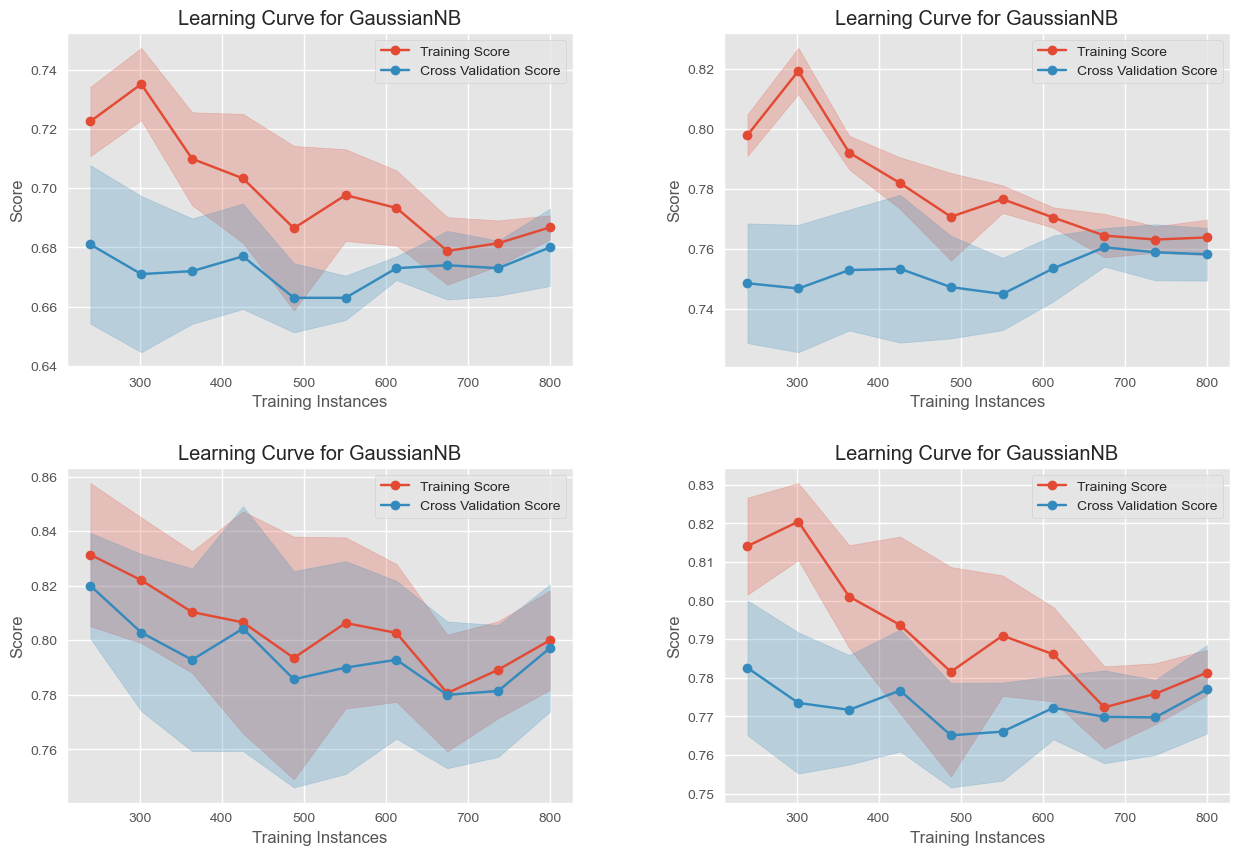

In [111]:
learning(GaussianNB())

<b>The learning curves show that with incresing number of instances the model generalizes.

<b> When more data is provided to the model, it will generalize well which is clear from the learning curves as the training and validation scores converge with increasing data

## 14.6. <u>Random Forest </u>

In [112]:
RF= RandomForestClassifier()
hyperparameters = {'n_estimators' :[1,2,5,10,15,25,30], 'max_features':[2,4,6,8],'max_depth':[0.01,1,10, 20, 25,30, 40, 50]}
RF_classifier =  GridSearchCV(RF, hyperparameters, refit=True, cv=5)
RF_classifier.fit(xtrain,ytrain);

In [113]:
print("The best fit value is found out to be :" ,RF_classifier.best_params_)

The best fit value is found out to be : {'max_depth': 10, 'max_features': 4, 'n_estimators': 25}


In [114]:
y_pred_rfc2 = RF_classifier.predict(xtest)

In [115]:
print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_rfc2))
print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_rfc2))


  Classification report : 
               precision    recall  f1-score   support

           0       0.64      0.27      0.38        60
           1       0.75      0.94      0.83       140

    accuracy                           0.73       200
   macro avg       0.69      0.60      0.60       200
weighted avg       0.72      0.73      0.70       200

Accuracy Score   :  0.735


### 14.6.1. Validation Curve for HyperParameter max_depth (Using Plotly):

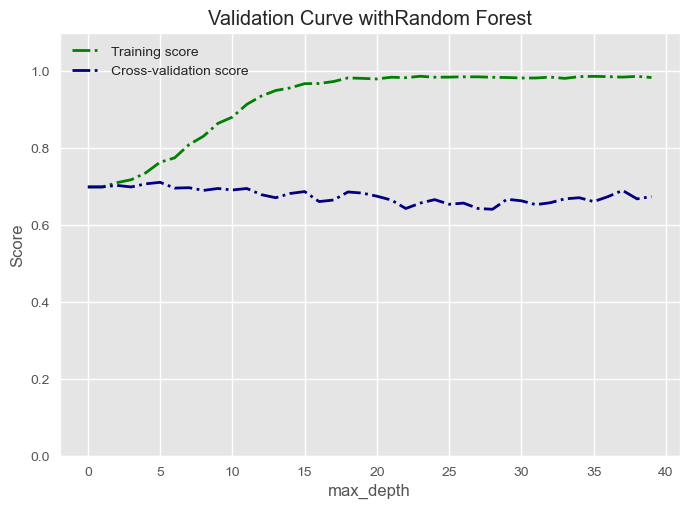

In [116]:
validation_plots('Random Forest',RandomForestClassifier(),'max_depth',np.arange(0.001, 40))

<b> The Validation curve shows that with increase in depth of the model the model will tend t be overfit. With lesser depths model will generalize well.


### 14.6.2. Validation Curve for HyperParameter max_depth (Using YellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


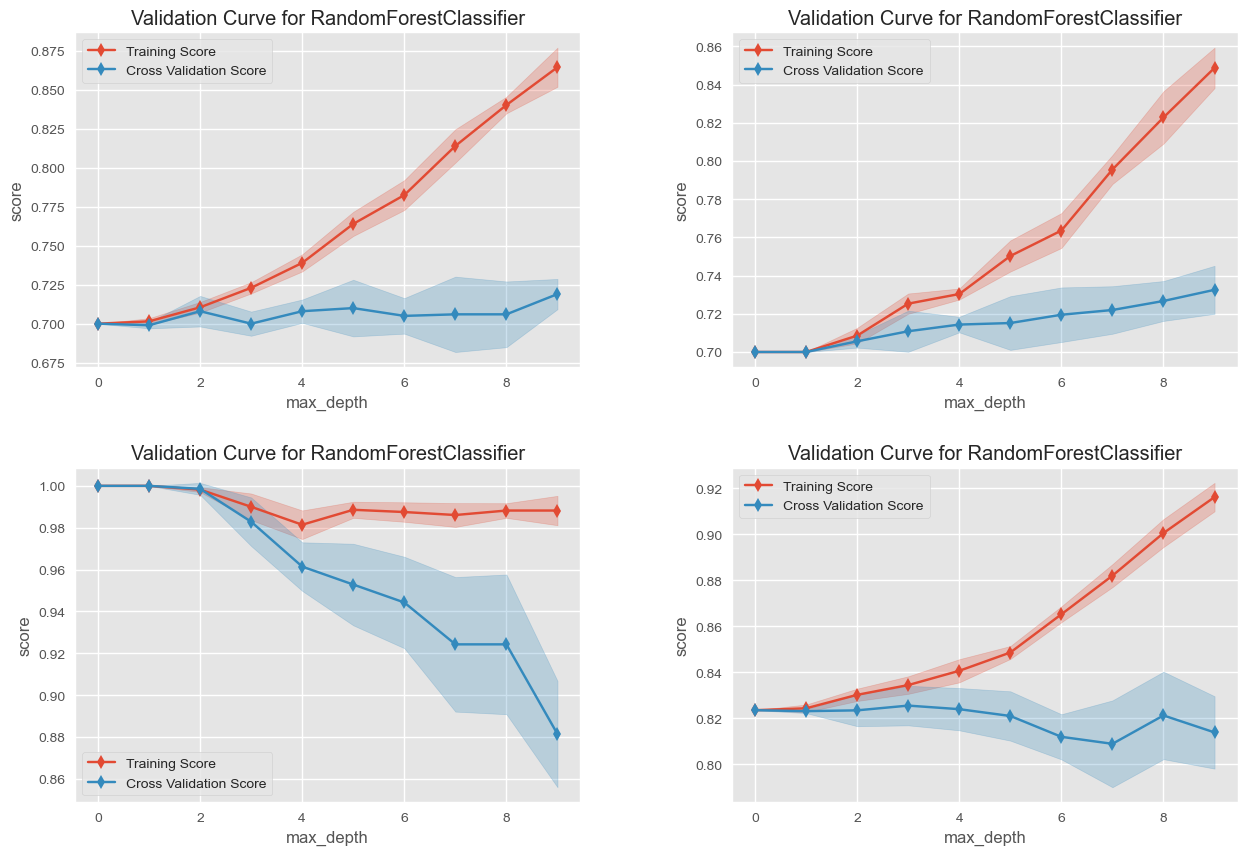

In [117]:
validation(RandomForestClassifier(),'max_depth',np.arange(0.001, 10))

<b> All 4 curves show that increasing depth of random forest will make the model overfit. The model will be more generalized when the depth is less than 0.

### 14.6.3. Learning Curves for Random Forest (Using YellowBrick):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


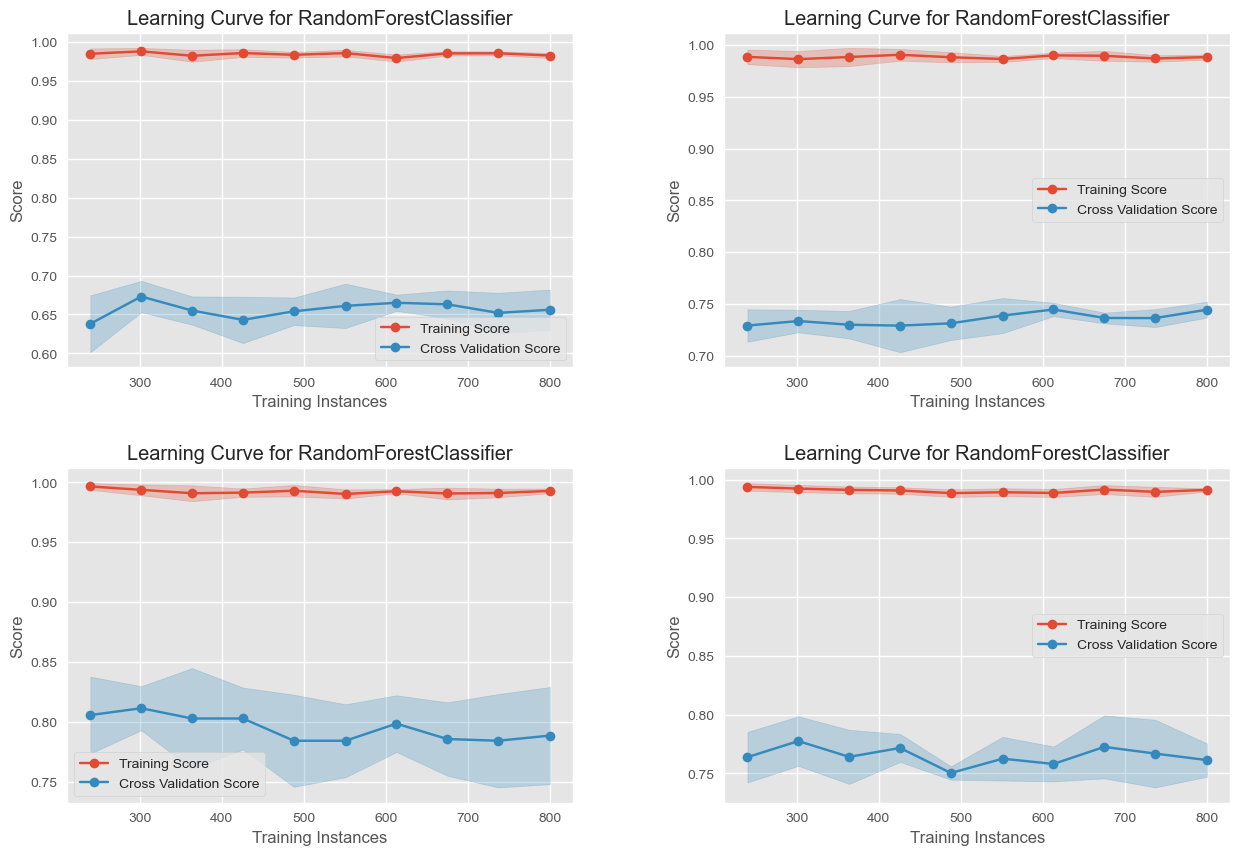

In [118]:
learning(RandomForestClassifier())

<b> The learning curves show that there will no positive impact on models performance with increase in number of instances

## 14.7. <u>XGBoost</u>

In [119]:
XGB= xgb.XGBClassifier()
hyperparameters = {"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],"max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15], 
                    "gamma":[ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}
                   
XGB_classifier =  GridSearchCV(XGB, hyperparameters, refit=True, cv=5)
XGB_classifier.fit(xtrain,ytrain);

In [120]:
print("The best fit value is found out to be :" ,XGB_classifier.best_params_)

The best fit value is found out to be : {'gamma': 0.1, 'learning_rate': 0.25, 'max_depth': 4}


In [121]:
y_pred_xgb2 = RF_classifier.predict(xtest)

In [122]:
print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_xgb2))
print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_xgb2))


  Classification report : 
               precision    recall  f1-score   support

           0       0.64      0.27      0.38        60
           1       0.75      0.94      0.83       140

    accuracy                           0.73       200
   macro avg       0.69      0.60      0.60       200
weighted avg       0.72      0.73      0.70       200

Accuracy Score   :  0.735


### 14.7.1. Validation Curve for HyperParamter Learning Rate (Using Plotly):

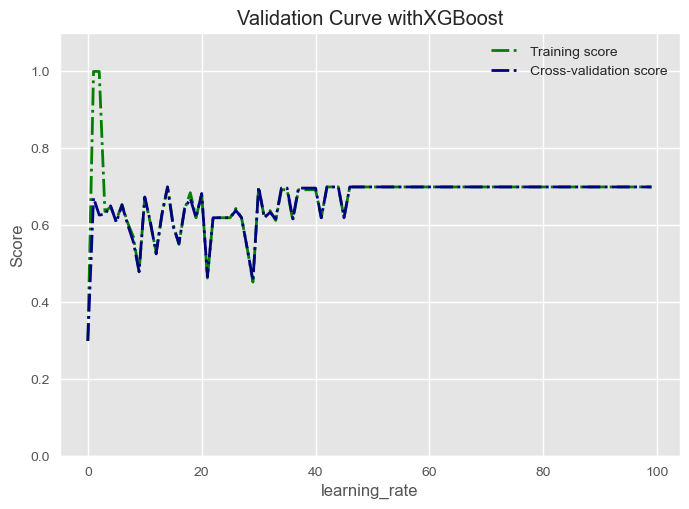

In [123]:
validation_plots('XGBoost',xgb.XGBClassifier(),'learning_rate', np.arange(0,100))

<b> The validation curve shows that the model us generalized well on a wide range of learning rate values. The performance stablizes when learning rate reaches near 50.

### 14.7.2. Validation Curves for HyperParamter Learning Rate (Using YellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


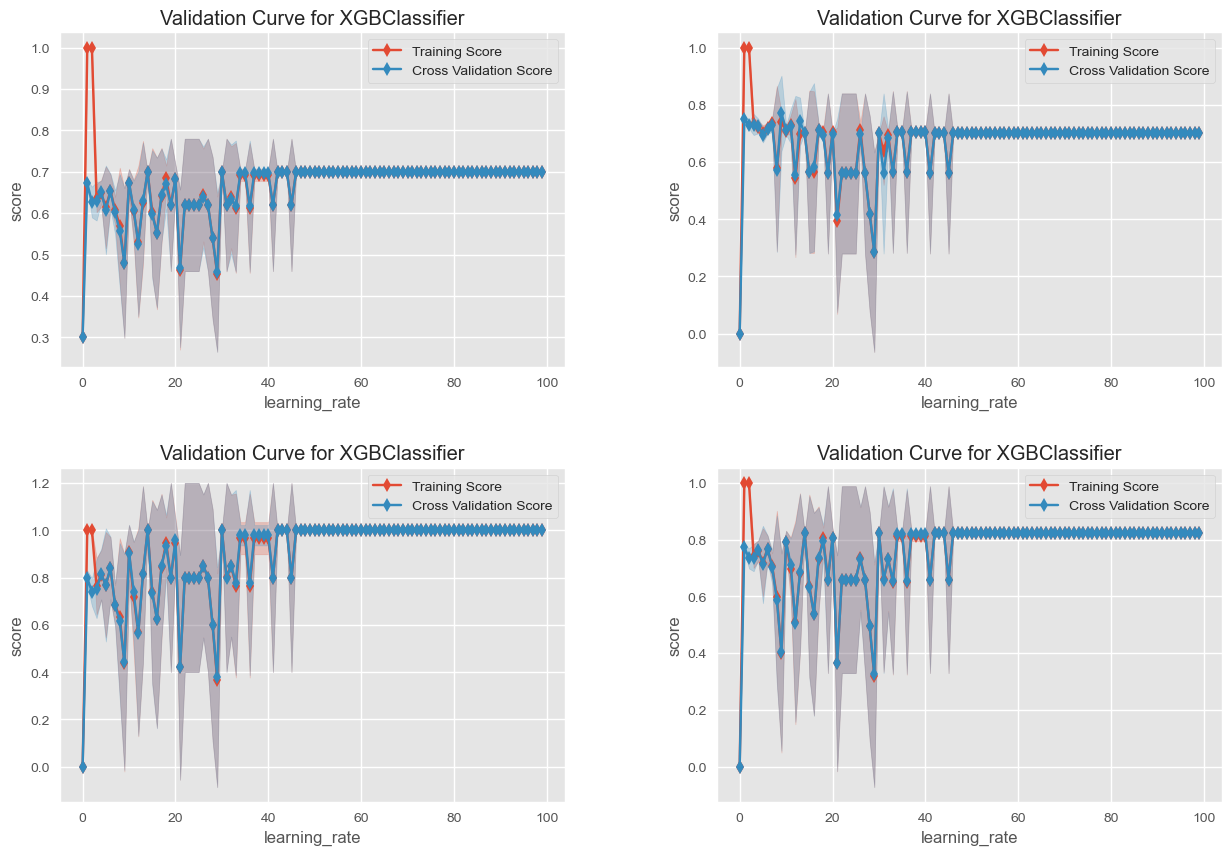

In [124]:
validation(xgb.XGBClassifier(),'learning_rate',np.arange(0,100))

<b> All the validation curve shows that the model us generalized well on a wide range of learning rate values. The performance stablizes when learning rate reaches near 50

### 14.7.3. Learning Curves for XGBoost (Using yellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


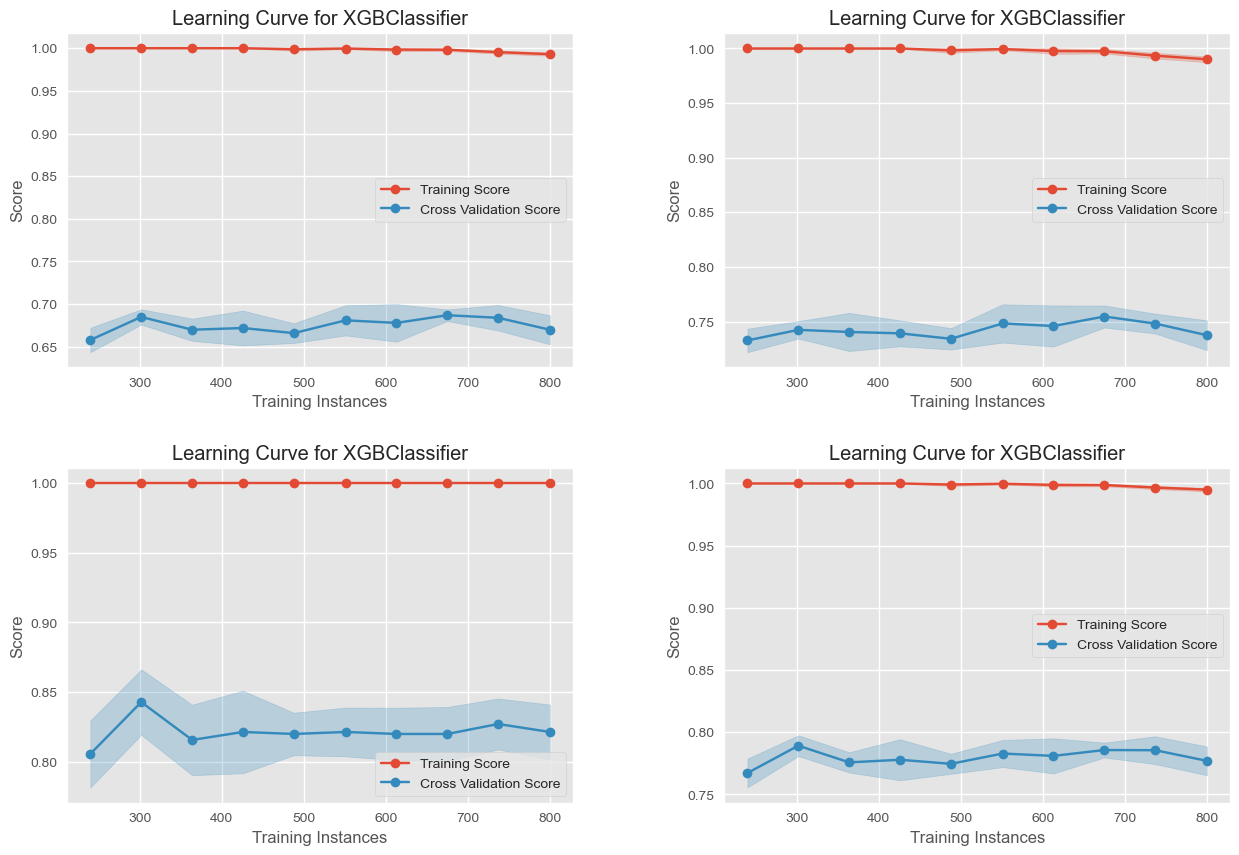

In [125]:
learning(xgb.XGBClassifier())

<b>The Learning curves show that there will no positive impact on models performance with increasing data.

## 14.8. <u>AdaBoost</u>

In [126]:
ADA = AdaBoostClassifier()
#ADA2= AdaBoostClassifier(learning_rate=0.25)
hyperparameters = {"learning_rate": [0.0001,0.05, 0.10, 0.15, 0.20, 0.25,0.26,0.27, 0.30 ]}

ADA_classifier =  GridSearchCV(ADA, hyperparameters, refit=True, cv=5)
ADA_classifier.fit(xtrain,ytrain);
#ADA2.fit(xtrain,ytrain)

In [127]:
print("The best fit value is found out to be :" ,ADA_classifier.best_params_)

The best fit value is found out to be : {'learning_rate': 0.3}


In [128]:
y_pred_ada2 = ADA_classifier.predict(xtest)
#y_pred_ada3 = ADA2.predict(xtest)

In [129]:
print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_ada2))
print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_ada2))


  Classification report : 
               precision    recall  f1-score   support

           0       0.38      0.08      0.14        60
           1       0.71      0.94      0.81       140

    accuracy                           0.69       200
   macro avg       0.55      0.51      0.47       200
weighted avg       0.61      0.69      0.61       200

Accuracy Score   :  0.685


### 14.8.1. Validation Curve for Hyperparameter Learning Rate (using Plotly):

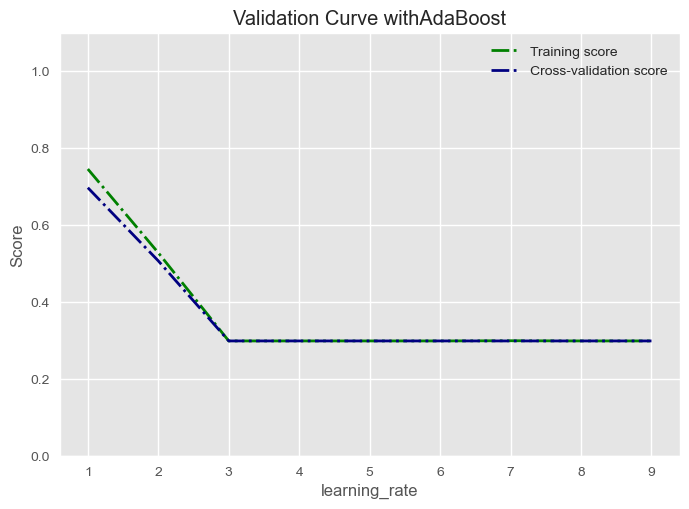

In [130]:
validation_plots('AdaBoost',AdaBoostClassifier(),'learning_rate',np.arange(1,10))

<b>The validation curve shows that although model generalized well for learning rate >=2 but the overall score will be greaty reduced for both training and validation.

### 14.8.2. Validation Curve for Hyperparameter Learning Rate (using YellowBricks):

The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


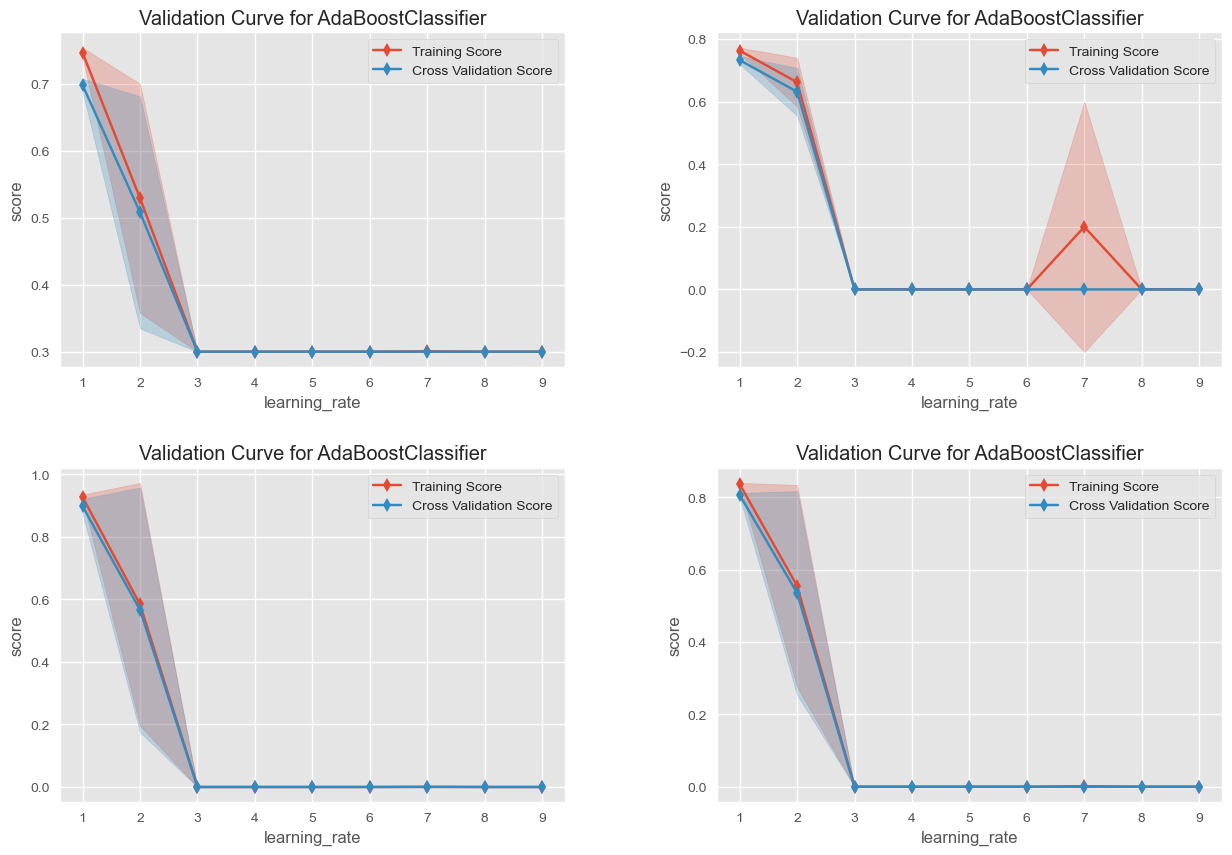

In [131]:
validation(AdaBoostClassifier(),'learning_rate',np.arange(1,10))

<b> Validation curve shows that for learning rate =1 the model has some differnce in the training and validation scores which is acceptable as the overall score is good. But as the learning rate increases the models genrelizes at the same time its overall score decreases.

### 14.8.3. Learning Curves for AdaBoost (Using yellowBricks):


The plots scores are in following order
:

 1 . Accuracy

 2 . Precision

 3 . Recall

 4 . f1


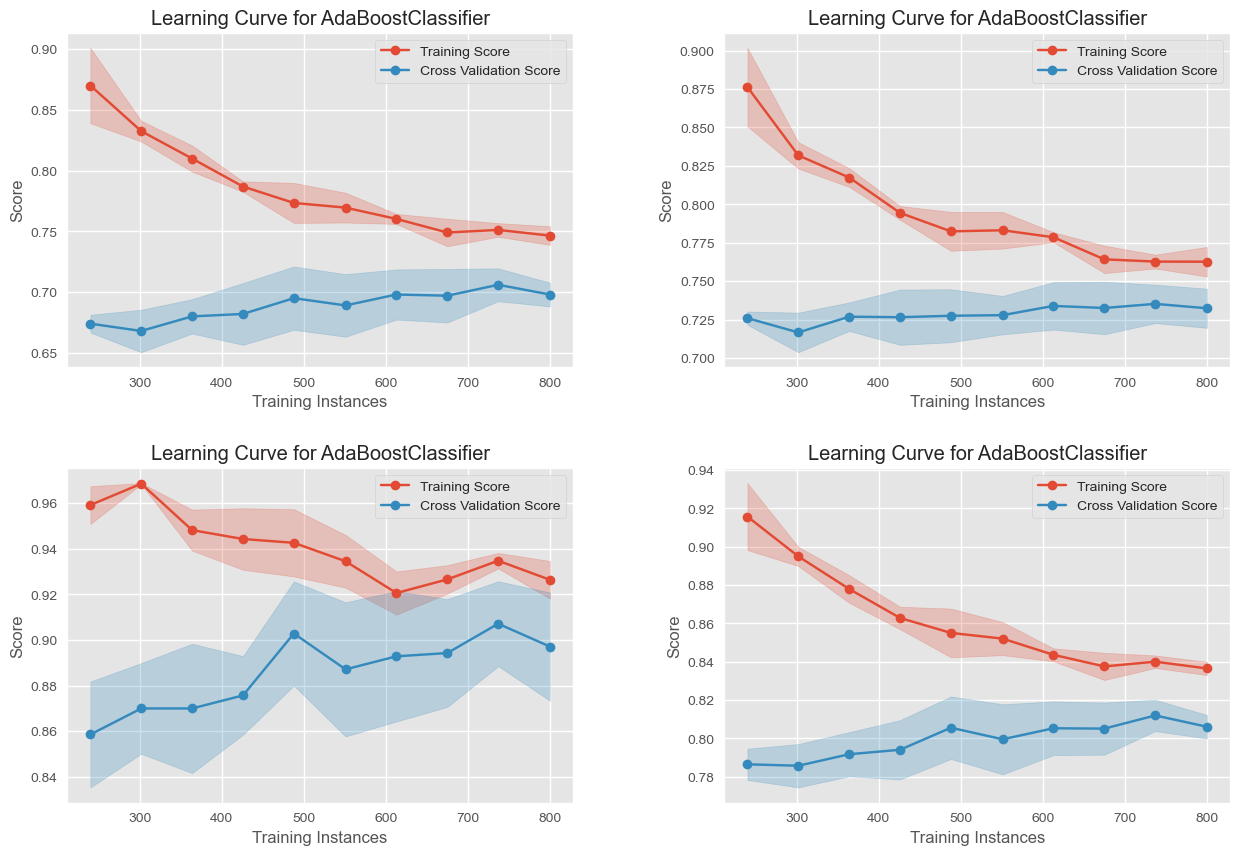

In [132]:
learning(AdaBoostClassifier())

<b>The learning curves show that training and validation score converge with increase in data and therfore model will generalize will with incresing number of instances.

## 15. Model Metrics After Hyper Parameter Tunning

In [133]:
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    roc_auc      = roc_auc_score(testing_y,predictions)
    
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "roc_auc"         : [roc_auc]
                       
                      })
    return df

model1 = model_report(LG_classifier,xtrain,xtest,ytrain,ytest,
                      "Logistic Reg. ")


model2 = model_report(RF_classifier,xtrain,xtest,ytrain,ytest,
                     "Random Forest Classifier")


model3 = model_report(XGB_classifier,xtrain,xtest,ytrain,ytest,
                     "XGBoost.")

model4 = model_report(knn_classifier,xtrain,xtest,ytrain,ytest,
                      "KNN Classifier")

model5 = model_report(NB_classifier,xtrain,xtest,ytrain,ytest,
                      "Naive Bayes")

model6 = model_report(DT_classifier,xtrain,xtest,ytrain,ytest,
                      "Decision Tree")

model7 = model_report(ADA_classifier,xtrain,xtest,ytrain,ytest,
                      "AdaBoost")

    
model_performances = pd.concat([model1,model4,model6,model5,model2, model3,model7],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

### Best Model


<b>From the model metrics summary above we can see that Logistic Regression performed well when considering all the scores as compared to other algorithms. It has the highest f1 score and accuracy. Precision, recall and and roc_auc is also comparable with other algorithms. Hence for our case Logistic Regression performed best.

# <center> **--End of Assignment --**</center>